# Movehub Dataset Analysis

**Names**: Han Chen, Aidan Chi, Natalie Chaidez, Frank Sun

## 1. Introduction

The objective of this data analysis is to explore and find possible patterns/trends in the dataset. These discoveries would help understand what features would be impactful.

The main research goal: learn about the dataset and it's clustering structure, and what clusters exist in this dataset. Ideally, we  will identify clusters that are considered "meaningful" in the context of our resarch motivation. Some common questions we would like the address for our goal are:

1.   Is the dataset clusterable?
2.   Are there natural clusters?
3.   Which algorithm would be useful in discovering clusters in the dataset?
4.   Are there noise and outliers in this dataset?
5.   What is the cohesion and separation look like?

In our data related to cities, countries, and their quality of life/cost of living, we would like to know if there are any attributes or factors that characterize our clusters for this dataset.


Research Motivation: Our dataset on the quality of life and cost of living across global cities can serve as a resource for not only individuals, but businesses and policymakers. Our insights can benefit these groups as individuals can make informed decisions on relocation, moving, or simply travelling based on insights we create and factors of this data. Businesses can use our insights stragetically for their global operations, expansions, and they are able to consider costs for these things and how it may impact their company and employees. Finally, policymakers will ideally be able to leverage the data to make informed decisions on urban developement and policies. This can create improved living situations for citizens. The audience for our insights is a large variety, but to narrow it down to these three groups, the insights we extract should be useable and actionable to them.

Motivation:

Nowadays in this globalized world, one's desire to explore and settle in new locales is a common aspiration. Individuals often seek opportunities to change their lifestyle while maintaining a certain standard of living. For instance, consider a person from New York City who is accustomed to a vibrant urban environment with high economic standard, diversed cultures, and social characteristics. If they wish to move to another country, they face the challenge of finding a city that offers a similar lifestyle and living standards.

The motivation behind our project grows from this need for informed global mobility. Our goal is to help individuals to identify cities worldwide that offer comparable living conditions to their current environment. This is particularly relevant for those who wish to relocate internationally without compromising the quality of life they are accustomed to.

incorporate three citations

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import numpy as np
from sklearn.cluster import KMeans
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram, cophenet
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import pdist, squareform
from sklearn.manifold import TSNE
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import adjusted_rand_score, silhouette_samples
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
from scipy.linalg import block_diag
from sklearn.cluster import DBSCAN

## 2. Dataset Discussion

We retrieved this dataset from kaggle using the following link for the full dataset, https://www.kaggle.com/datasets/blitzr/movehub-city-rankings?select=movehubqualityoflife.csv And the data used for this dataset is extracted from www.movehub.com.
However, this dataset was refined, merged and cleaned, provided by Dr. Ellison. Our group downloaded this dataset on 11/30/23.

This data contains the various costs of living, and quality of life metrics for 198 global cities across numerous countries. Our final dataset that we will be using is a merged dataset of all three given on the kaggle link. Our city and country pairs are derived from movehub.com. Each row represents a city and it's coresponding country, and the evaluated metrics of a few different factors. The columns describe costs of Cappuccino, Cinema, Wine, Gasoline, Avg Rent, Avg Disposable Income. There is also the Movehub Rating score, Purchase Power, Health Care, Pollution, Quality of Life, and Crime Rating. There are 14 columns in total, and 185 rows. The movehub rating vaariable is a combination of all scores for the overall rating for a city/country. The purchase power compares the average cost of living with the average local wage, healthcare is compiled from how citizens feel about their access to healthcare and its quality. Pollution is a score of how polluted citizens find their country to be, a lower score is better. Quality of life is a balance of overall quality based on factors to give it an overall score. Crime rating represents how low/high crime is in that city. The lower the score, the more safe citizens feel.

Overall, the dataset is relatively inclusive as it covers a lot of cities and countries, but there are still plenty more, specific cities worldwide that can be considered. Not all possible observations are included in this dataset. Countries that lack strong data insights likely are not included, and this may impact how the people in our research motivation see our results. If they plan to evaluate a specific city mentioned in our data, this data is beneficial to them, otherwise, they may have to look into insights elsewhere.







In [ ]:
df = pd.read_csv('movehub_data_cleaned.csv')
df.head()

City        Country  Cappuccino  Cinema   Wine  Gasoline  Avg Rent  \
0   Lausanne    Switzerland        3.15   12.59   8.40      1.32   1714.00   
1     Geneva    Switzerland        2.80   12.94  10.49      1.28   2607.95   
2      Basel    Switzerland        3.50   11.89   7.35      1.25   1649.29   
3      Perth      Australia        2.87   11.43  10.08      0.97   2083.14   
4  Nashville  United States        3.84   12.00  13.50      0.65   2257.14   

   Avg Disposable Income  Movehub Rating  Purchase Power  Health Care  \
0                4266.11           87.21           90.77        65.85   
1                3917.72           83.27           61.22        74.88   
2                3847.76           84.20           78.17        79.74   
3                3358.55           95.38           62.11        80.56   
4                3089.75           80.61           80.30        60.30   

   Pollution  Quality of Life  Crime Rating  
0      87.62            73.21         35.55  
1      29.43            82.76         54.36  
2      59.18            88.27         28.12  
3      23.53            74.62         50.01  
4       0.00            80.50         25.50

In [ ]:
rownum = df.shape[0]
rownum

185

## 3. Dataset Cleaning and Exploration

We have detected zero missing values, both implicit and explicit. We checked for NaN values, and by checking the types of each variable, determined if there are any implicit missing values. Therefore, we are not dropping any missing values. When detecting for outliers, we determined the city "Riyadh" as a clear outlier and will be removing this city. We also noticed a few more outliers in the scatterplot, and will be such as the city of Tehran, as it has a Wine value above 20, an outlier for this variable. And the city Hong Kong, with an outlier in its average Rent. We will not be dropping any of these except the city of Riyadh given that it has the clearest outlier, and a provided hint by the professor.

**Missing Value Detection and Cleaning**

In [ ]:
df.dtypes

City                      object
Country                   object
Cappuccino               float64
Cinema                   float64
Wine                     float64
Gasoline                 float64
Avg Rent                 float64
Avg Disposable Income    float64
Movehub Rating           float64
Purchase Power           float64
Health Care              float64
Pollution                float64
Quality of Life          float64
Crime Rating             float64
dtype: object

As we observe the data types for this dataset. There are two categorical variables. We need to consider removing them later before standardizing them.

In [ ]:
df["City"].unique()

array(['Lausanne', 'Geneva', 'Basel', 'Perth', 'Nashville', 'Canberra',
       'Bergen', 'Luxembourg', 'Stavanger', 'Adelaide', 'Ottawa',
       'Trondheim', 'Oslo', 'Doha', 'Sydney', 'Cambridge', 'Gold Coast',
       'Melbourne', 'Brisbane', 'New York', 'Boston', 'Darwin', 'Newark',
       'The Hague', 'Seattle', 'Dubai', 'Gothenburg', 'Atlanta',
       'Baltimore', 'Calgary', 'Hong Kong', 'Honolulu', 'Edmonton',
       'Las Vegas', 'Auckland', 'Saint Louis', 'Abu Dhabi', 'Houston',
       'Dallas', 'Chicago', 'Austin', 'Dresden', 'Los Angeles',
       'Charlotte', 'Tokyo', 'Indianapolis', 'Paris', 'Munich', 'Orlando',
       'Toulouse', 'Stockholm', 'Copenhagen', 'London', 'Edinburgh',
       'Leeds', 'Helsinki', 'Stuttgart', 'New Orleans', 'Dublin',
       'Regina', 'Toronto', 'Detroit', 'Brussels', 'Venice', 'Leicester',
       'Nottingham', 'Strasbourg', 'Montreal', 'Berlin', 'Wellington',
       'Amsterdam', 'Hamburg', 'Aberdeen', 'Lyon', 'Rotterdam', 'Cologne',
       'Oxford', 

In [ ]:
df["Country"].unique()

array(['Switzerland', 'Australia', 'United States', 'Norway',
       'Luxembourg', 'Canada', 'Qatar', 'United Kingdom', 'Netherlands',
       'United Arab Emirates', 'Sweden', 'Hong Kong', 'New Zealand',
       'Senegal', 'Germany', 'Japan', 'France', 'Denmark', 'Finland',
       'Ireland', 'Belgium', 'Italy', 'Austria', 'Oman', 'Singapore',
       'South Korea', 'Brazil', 'Spain', 'South Africa', 'Israel',
       'Bahrain', 'Cyprus', 'Taiwan', 'Russia', 'Slovenia', 'Portugal',
       'Czech Republic', 'Malaysia', 'Greece', 'Slovakia', 'Poland',
       'Argentina', 'Chile', 'Croatia', 'India', 'China', 'Mexico',
       'Uruguay', 'Dominican Republic', 'Botswana', 'Venezuela',
       'Lithuania', 'Thailand', 'Jordan', 'Hungary', 'Iran', 'Peru',
       'Romania', 'Turkey', 'Ukraine', 'Serbia', 'Bulgaria', 'Nigeria',
       'Azerbaijan', 'Indonesia', 'Mongolia', 'Sri Lanka', 'Colombia',
       'Kenya', 'Bangladesh', 'Belarus', 'Albania', 'Morocco',
       'Philippines', 'Ecuador', 'Vietna

In [ ]:
df.isna().sum()

City                     0
Country                  0
Cappuccino               0
Cinema                   0
Wine                     0
Gasoline                 0
Avg Rent                 0
Avg Disposable Income    0
Movehub Rating           0
Purchase Power           0
Health Care              0
Pollution                0
Quality of Life          0
Crime Rating             0
dtype: int64

**Outlier Identification - Two Variable Outliers**

Using a pairplot, we could see a few outliers throughout the scatterplots. We could see a few relationships between the variables, such as cinema and avg rent with a positive trend.

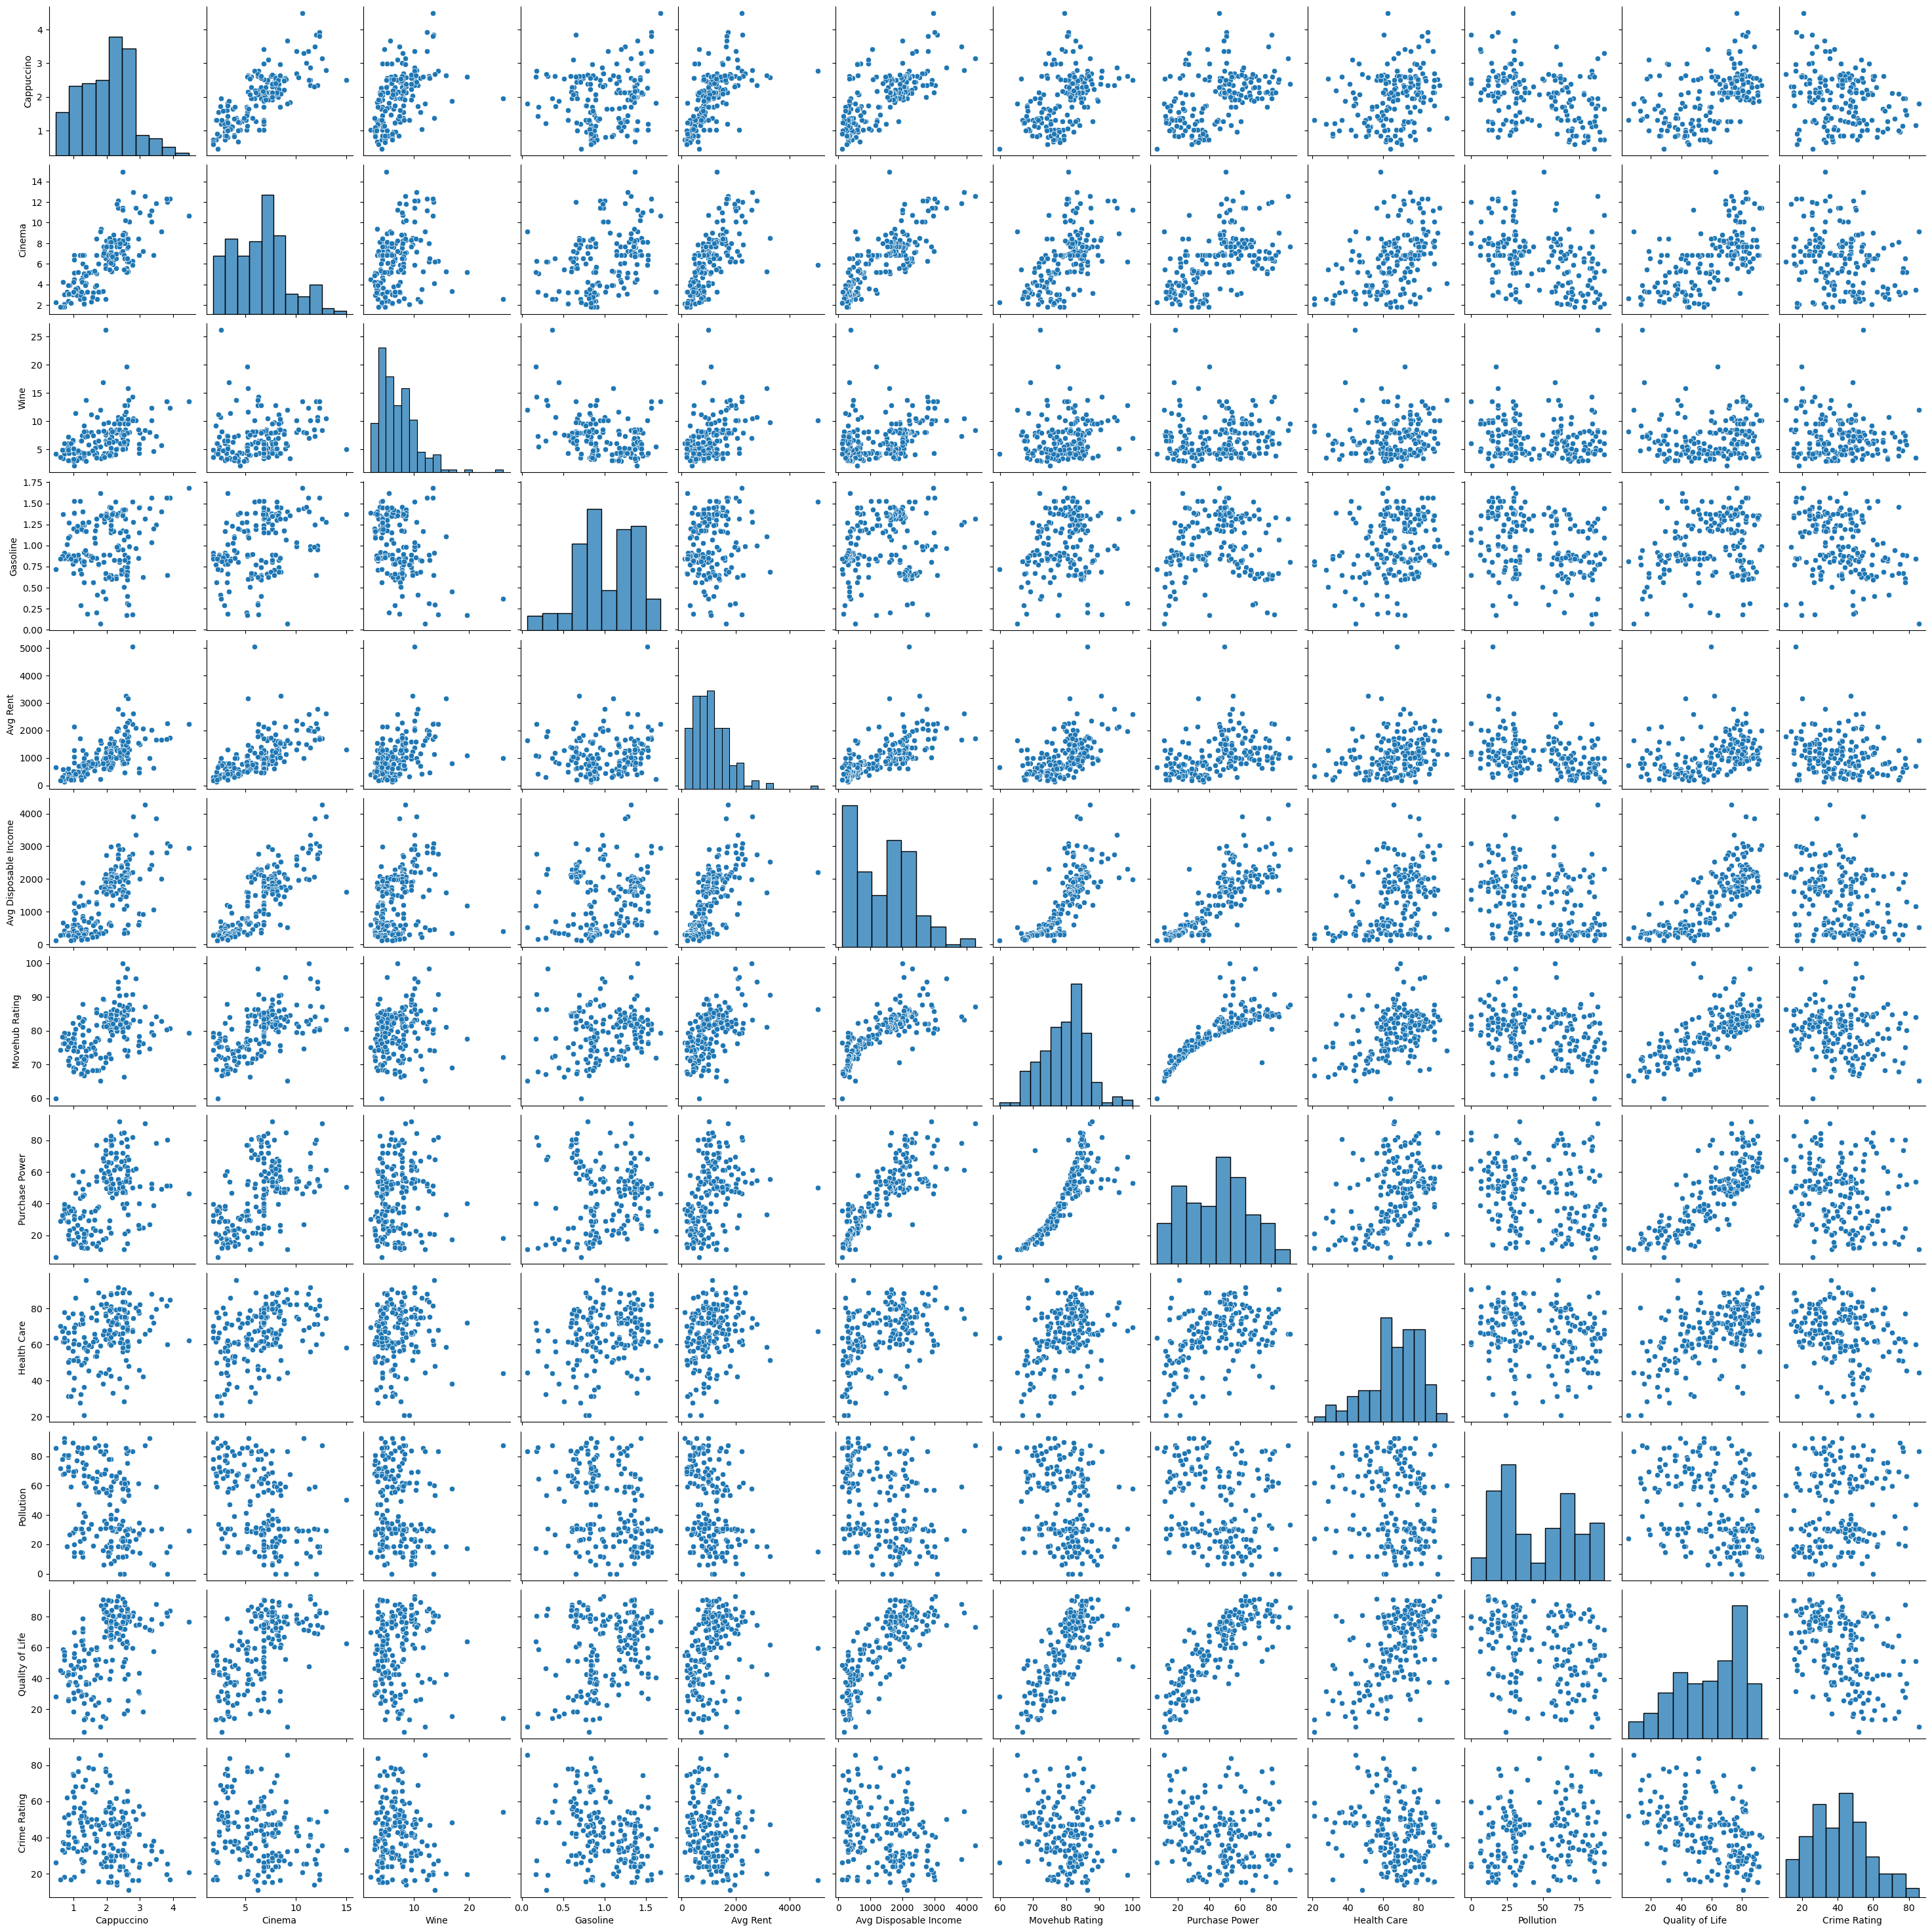

In [ ]:
sns.pairplot(df)

After seeing the pairplot, there are two apparent outliers. One is in Wine which has a value greater than 20. One is in Avg Rent which has a values greater than 4000. Further technique should be implememented.

In [ ]:
df[df['Wine'] > 20]

City Country  Cappuccino  Cinema   Wine  Gasoline  Avg Rent  \
146  Tehran    Iran        1.96    2.62  26.15      0.37    980.65   

     Avg Disposable Income  Movehub Rating  Purchase Power  Health Care  \
146                 392.26           72.13           18.09        43.98   

     Pollution  Quality of Life  Crime Rating  
146      87.62            14.33         54.16

Most of the correlation among variables seem fine. However, Quality of Life, Average Disposable Income, Purchase Power and Movehub Rating seem like have a high correlation with other variables. We should be cautious of multicolinearity in further analysis.

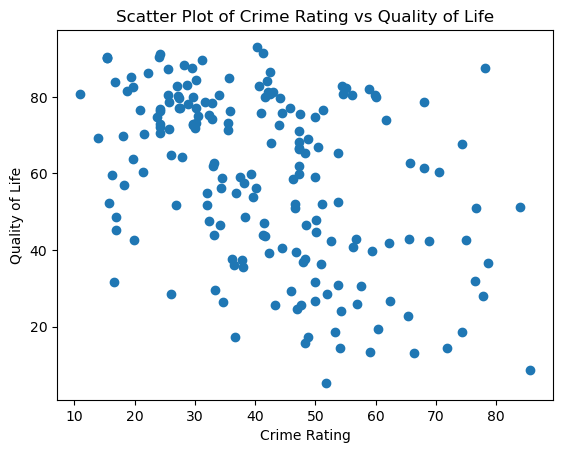

In [ ]:
plt.scatter(df['Crime Rating'], df['Quality of Life'])
plt.title('Scatter Plot of Crime Rating vs Quality of Life')
plt.xlabel('Crime Rating')
plt.ylabel('Quality of Life')

# Show the plot
plt.show()

Crime Rating vs. Quality of Life exhibits normal behavior with no strong correlation.

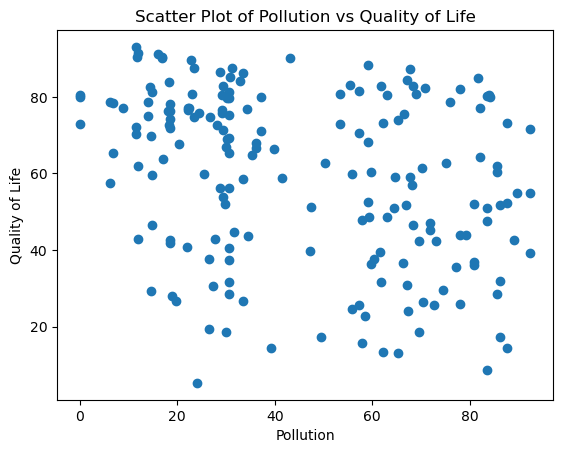

In [ ]:
plt.scatter(df['Pollution'], df['Quality of Life'])
plt.title('Scatter Plot of Pollution vs Quality of Life')
plt.xlabel('Pollution')
plt.ylabel('Quality of Life')

# Show the plot
plt.show()

There seems to be a weak separation for Pollution greater than 40 and Pollution less than 40 in terms of Quality of Life.

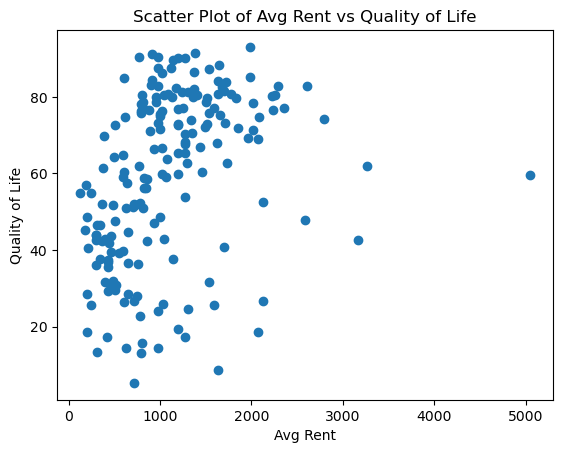

In [ ]:
plt.scatter(df['Avg Rent'], df['Quality of Life'])
plt.title('Scatter Plot of Avg Rent vs Quality of Life')
plt.xlabel('Avg Rent')
plt.ylabel('Quality of Life')

# Show the plot
plt.show()

There is an outlier for Avg Rent around 5000. Maybe we need to consider removing it.

In [ ]:
df[df['Avg Rent'] > 5000]


City    Country  Cappuccino  Cinema  Wine  Gasoline  Avg Rent  \
30  Hong Kong  Hong Kong        2.78    5.89  10.1      1.52   5052.31   

    Avg Disposable Income  Movehub Rating  Purchase Power  Health Care  \
30                2210.39           86.37           50.07        67.59   

    Pollution  Quality of Life  Crime Rating  
30      14.88             59.5         16.31

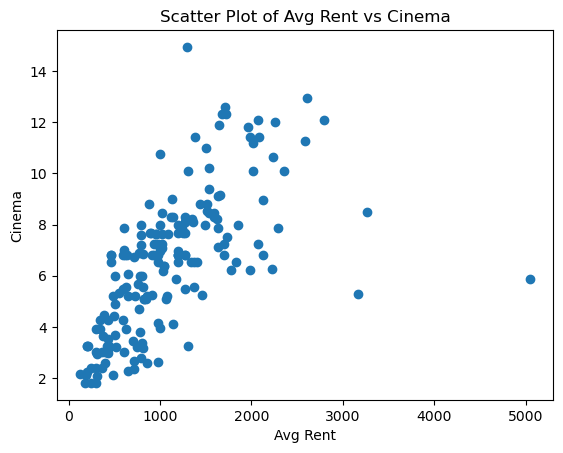

In [ ]:
plt.scatter(df['Avg Rent'], df['Cinema'])
plt.title('Scatter Plot of Avg Rent vs Cinema')
plt.xlabel('Avg Rent')
plt.ylabel('Cinema')

# Show the plot
plt.show()

There is a upward trend for Avg Rent vs. Cinema. There is an outlier in avg rent which is what we discovered in the last part.

**Outlier Identification - Three+ Variable Outliers**

In [ ]:
# numerical part of our data
# dropped city and country
dropped_df = df.drop(['City','Country'], axis = 1)

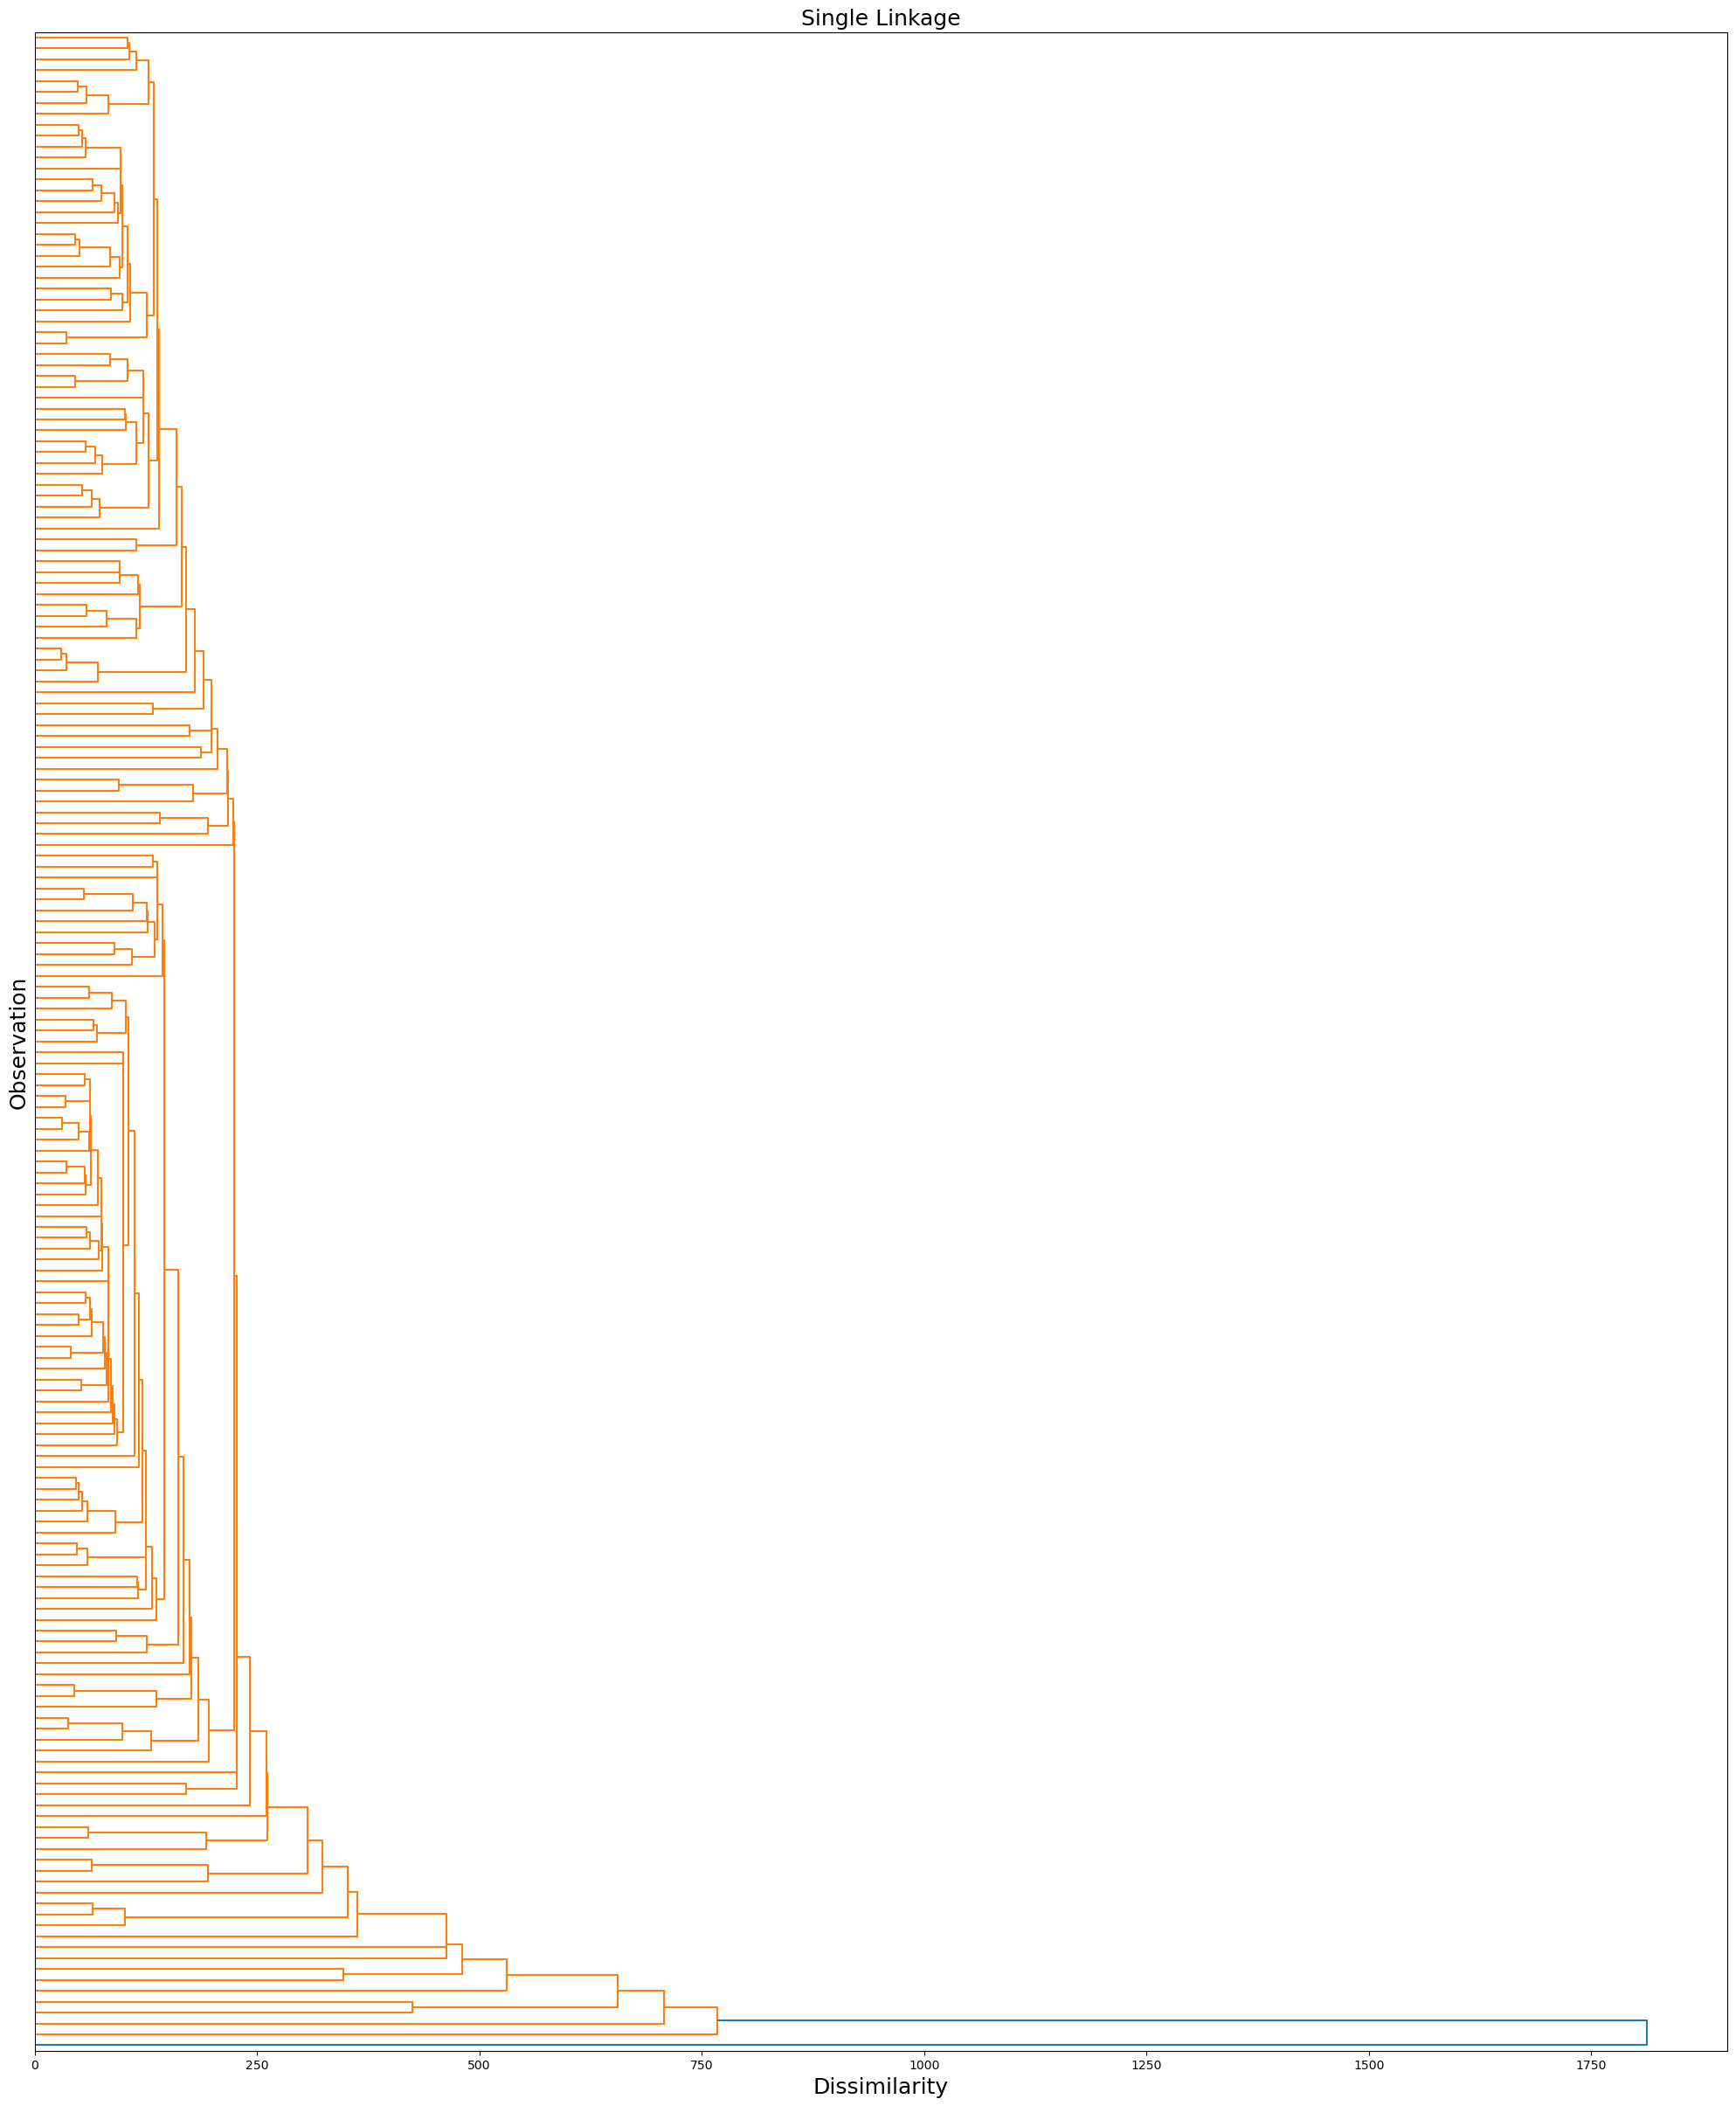

In [ ]:
## Three Variables, Single linkage, Hierarchical Clustering
dm = pdist(dropped_df, metric = 'euclidean')
link = linkage(dm, method = 'single')
fig, ax = plt.subplots(figsize = (25,30))
d = dendrogram(link, orientation = 'right', ax = ax, truncate_mode = 'lastp', p = 200, no_labels = True)
ax.set_xlabel('Dissimilarity', fontsize = 18)
ax.set_ylabel('Observation', fontsize = 18)
plt.yticks(fontsize = 12)
plt.title('Single Linkage', fontsize = 18)
plt.show()

**Outlier Consideration**

We are not going to remove any of these detected outliers because there are not that many, and they are not incredibly distinct outliers. and as of right now we do not want to remove any important cities. However, given the hint of the one clear outlier is the city of Riyadh, and we will be removing this outlier given that it does not seem to be a significant, large city and we would like our data insights to be improved and accurate.



In [ ]:
df = df[df["City"] != "Riyadh"]

**Noise Consideration and Identification**

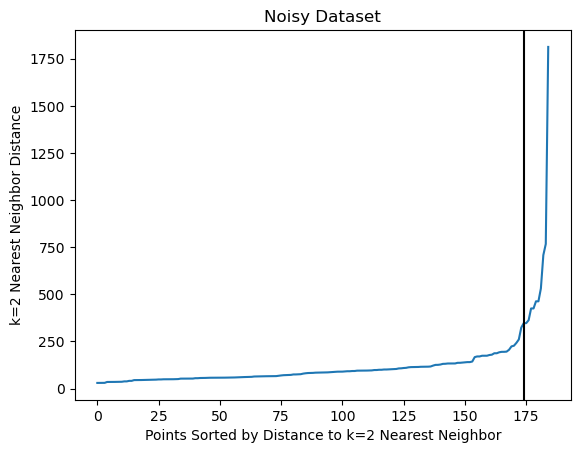

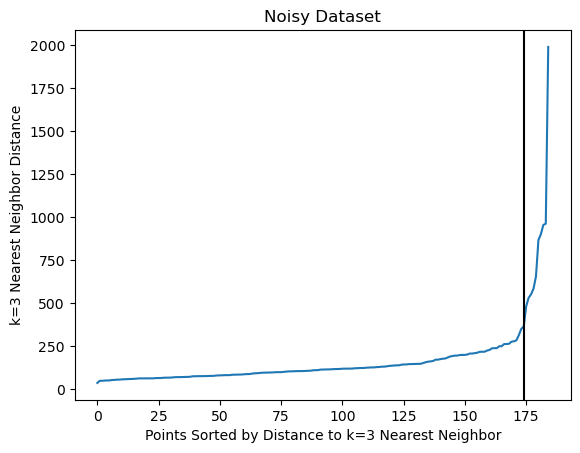

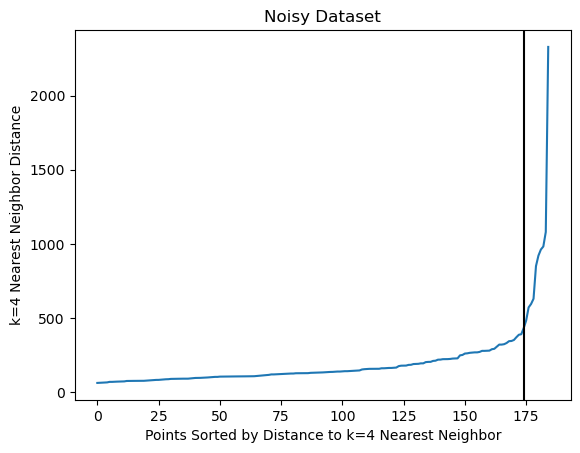

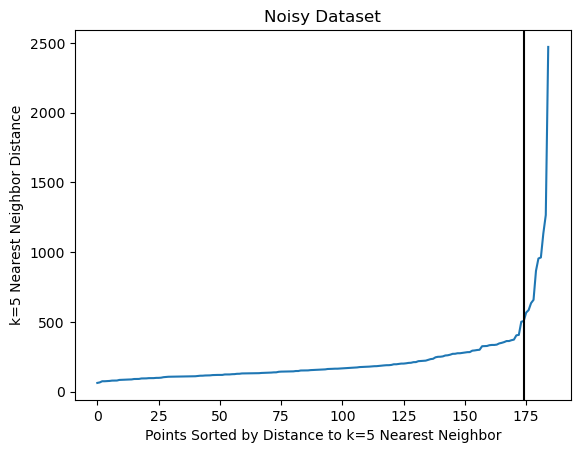

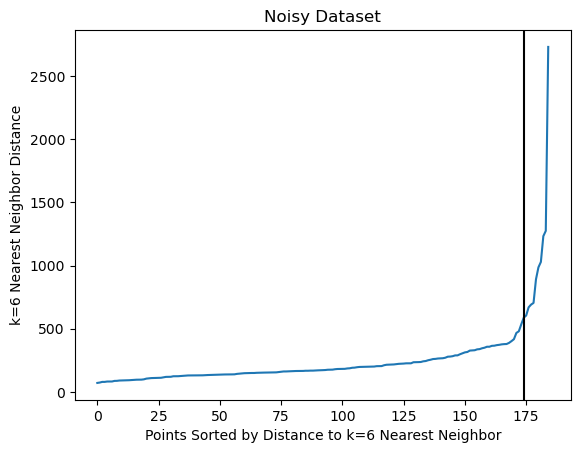

In [ ]:
#noise consideration
#Find the distance of the kth nearest neighbor
for k in range(2,7):
    nbrs = NearestNeighbors(n_neighbors=k, algorithm='ball_tree').fit(dropped_df)
    distances, indices = nbrs.kneighbors(dropped_df)

    plt.plot(np.sort(distances.T[k-1]))
    plt.axvline(x=len(dropped_df)-11, color='black')
    plt.xlabel('Points Sorted by Distance to k=%s Nearest Neighbor'%k)
    plt.ylabel('k=%s Nearest Neighbor Distance'%k)
    plt.title('Noisy Dataset')
    plt.show()

## 4. Basic Descriptive Analytics

From using .describe(), we could see two variables that standout from the rest. Specifically, Avg Rent and Avg Disposable Income have much higher numbers than the other columns. This could potentially affect results since their numbers are bigger, therefore having more influence compared to the other variables. So we would need to keep that in mind when we decide if we want to scale or not.

### Numeric Attributes

In [ ]:
df.describe()

Cappuccino      Cinema        Wine    Gasoline     Avg Rent  \
count  185.000000  185.000000  185.000000  185.000000   185.000000   
mean     1.978216    6.461351    7.040703    1.013838  1100.064811   
std      0.762252    2.736618    3.378529    0.349151   676.618422   
min      0.460000    1.810000    2.130000    0.070000   120.680000   
25%      1.310000    4.260000    4.260000    0.780000   618.050000   
50%      2.090000    6.820000    6.340000    0.990000   980.650000   
75%      2.490000    7.970000    8.400000    1.330000  1432.980000   
max      4.480000   14.950000   26.150000    1.680000  5052.310000   

       Avg Disposable Income  Movehub Rating  Purchase Power  Health Care  \
count             185.000000      185.000000       185.00000   185.000000   
mean             1393.807297       79.612108        45.57973    65.992000   
std               911.383515        6.658616        20.37569    14.943033   
min               120.680000       59.880000         6.38000    20.830000   
25%               527.890000       75.070000        28.82000    58.900000   
50%              1494.670000       80.680000        47.98000    67.590000   
75%              2045.960000       84.080000        60.36000    77.290000   
max              4266.110000      100.000000        91.85000    95.960000   

        Pollution  Quality of Life  Crime Rating  
count  185.000000       185.000000    185.000000  
mean    45.904919        59.038811     41.613135  
std     25.968225        22.153796     16.278047  
min      0.000000         5.290000     10.860000  
25%     23.530000        42.450000     29.530000  
50%     37.210000        62.820000     41.370000  
75%     68.210000        78.060000     51.030000  
max     92.420000        93.050000     85.700000

### Categorical Attributes

In [ ]:
df['Country'].value_counts()


Country
United States         19
United Kingdom        15
India                 13
Canada                 8
Australia              8
                      ..
Croatia                1
Mexico                 1
Uruguay                1
Dominican Republic     1
Ethiopia               1
Name: count, Length: 79, dtype: int64

There are 79 different countries in this dataset with United States has the highest obervations followed by United Kingdom and India.

In [ ]:
df['City'].value_counts()

City
Lausanne        1
Santiago        1
Lisbon          1
Prague          1
Kuala Lumpur    1
               ..
Leicester       1
Nottingham      1
Strasbourg      1
Montreal        1
Indore          1
Name: count, Length: 185, dtype: int64

There are 185 different cities in the dataset.

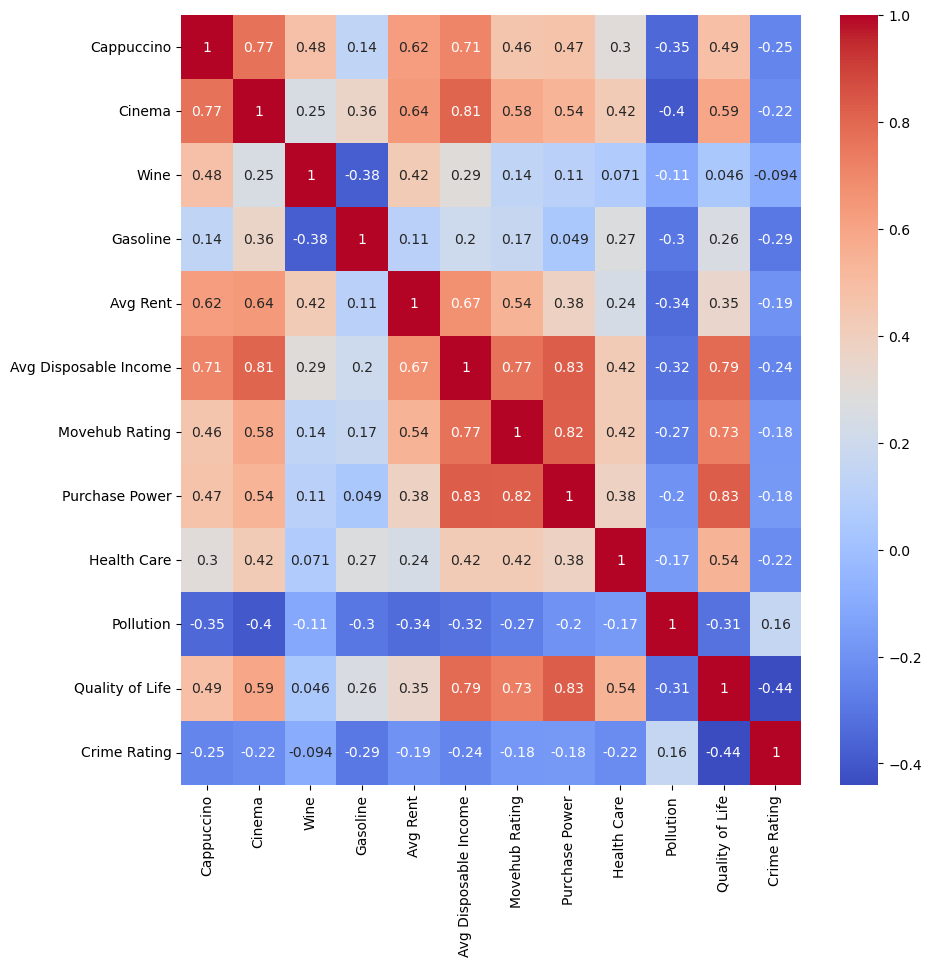

In [ ]:
# heatmap to explore the correlation
plt.figure(figsize=(10,10))
sns.heatmap(dropped_df.corr(), annot=True, cmap='coolwarm')
plt.show()

Cappuccino has high correlation with Cinema, Avg Disposable Income. Quality of Life also has high correlation with a lot of variables.

## 5. Scaling Decisions

Since the avg rent/disposable income stands out compared to the other variables, we would like to scale to ensure the those two variables would not be disproportionately influencing the results.

In [ ]:
st_tmp_1 = StandardScaler()

In [ ]:
df_transform = st_tmp_1.fit_transform(dropped_df)
#adding back the column names
X=pd.DataFrame(df_transform, columns=dropped_df.columns)

In [ ]:
#Added the Categorical Columns back
df_scaled = X.copy()
df_scaled['City'] = df['City']
df_scaled['Country'] = df['Country']


In [ ]:
X.describe()

Cappuccino        Cinema        Wine      Gasoline      Avg Rent  \
count  1.850000e+02  1.850000e+02  185.000000  1.850000e+02  1.850000e+02   
mean   2.304463e-16  7.681543e-17    0.000000 -9.601929e-17  1.536309e-16   
std    1.002714e+00  1.002714e+00    1.002714  1.002714e+00  1.002714e+00   
min   -1.997157e+00 -1.704284e+00   -1.457448 -2.710573e+00 -1.451398e+00   
25%   -8.790134e-01 -8.065886e-01   -0.825285 -6.715502e-01 -7.143212e-01   
50%    1.470474e-01  1.314111e-01   -0.207962 -6.845901e-02 -1.769666e-01   
75%    6.732324e-01  5.527781e-01    0.403426  9.079744e-01  4.933632e-01   
max    3.291003e+00  3.110293e+00    5.671449  1.913126e+00  5.857024e+00   

       Avg Disposable Income  Movehub Rating  Purchase Power   Health Care  \
count             185.000000    1.850000e+02    1.850000e+02  1.850000e+02   
mean                0.000000    7.681543e-16    7.681543e-17 -3.456694e-16   
std                 1.002714    1.002714e+00    1.002714e+00  1.002714e+00   
min                -1.400708   -2.971436e+00   -1.929069e+00 -3.030480e+00   
25%                -0.952691   -6.839911e-01   -8.247677e-01 -4.758904e-01   
50%                 0.110970    1.608127e-01    1.181204e-01  1.072297e-01   
75%                 0.717505    6.728149e-01    7.273560e-01  7.581232e-01   
max                 3.160138    3.070190e+00    2.277019e+00  2.010925e+00   

          Pollution  Quality of Life  Crime Rating  
count  1.850000e+02     1.850000e+02  1.850000e+02  
mean   9.601929e-17    -3.072617e-16 -1.728347e-16  
std    1.002714e+00     1.002714e+00  1.002714e+00  
min   -1.772531e+00    -2.432751e+00 -1.894367e+00  
25%   -8.639650e-01    -7.508342e-01 -7.443107e-01  
50%   -3.357378e-01     1.711422e-01 -1.497692e-02  
75%    8.612683e-01     8.609273e-01  5.800708e-01  
max    1.796092e+00     1.539397e+00  2.715713e+00

After scaling, we could see after using .describe() there are no values that stand out.

## 6. Clusterability and Clustering Structure

We use t-SNE plots to help check the clustering structure and to see if the dataset is indeed clusterable.

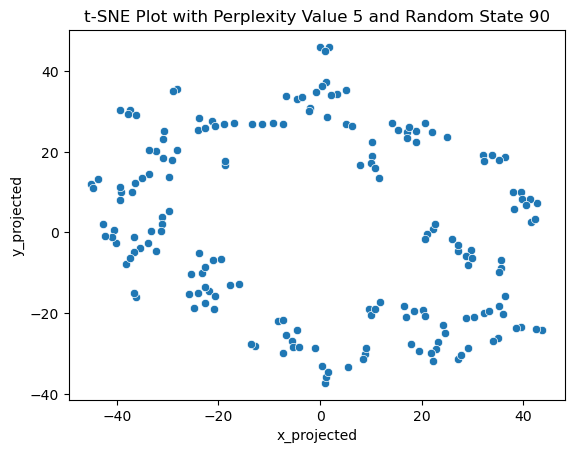

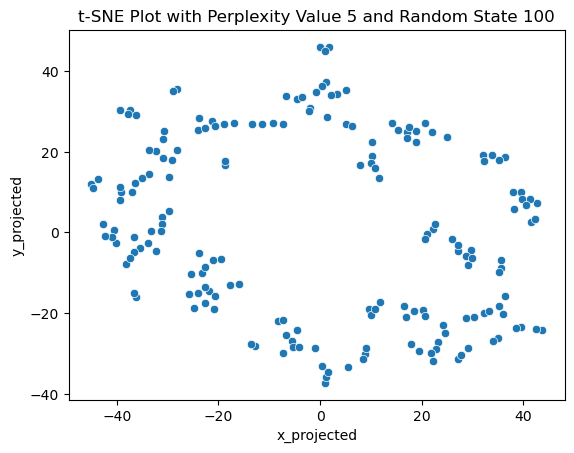

--------------------------------------------


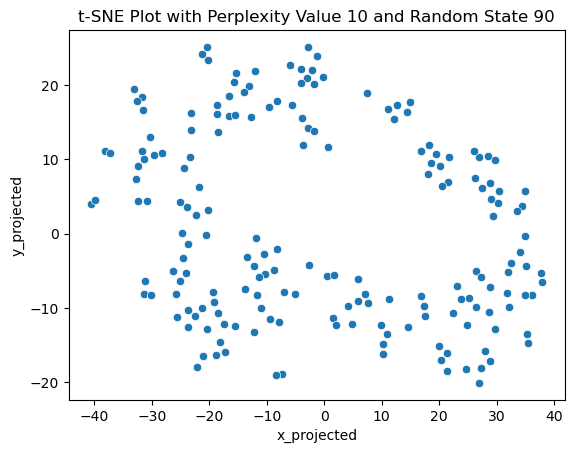

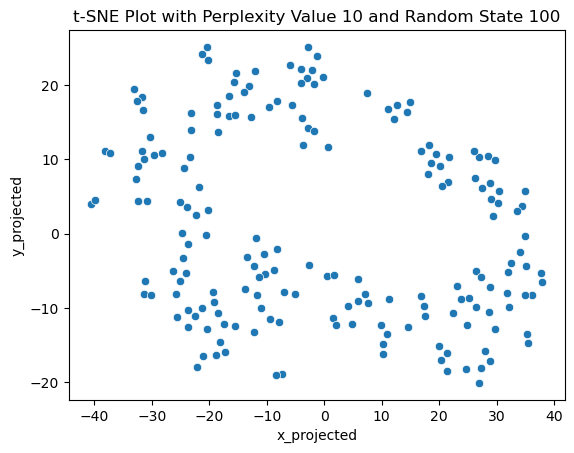

--------------------------------------------


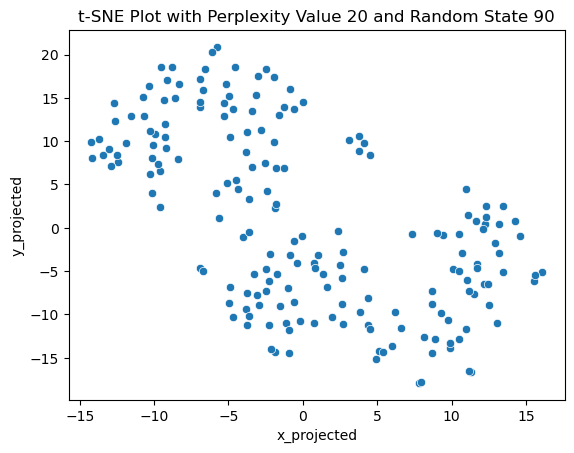

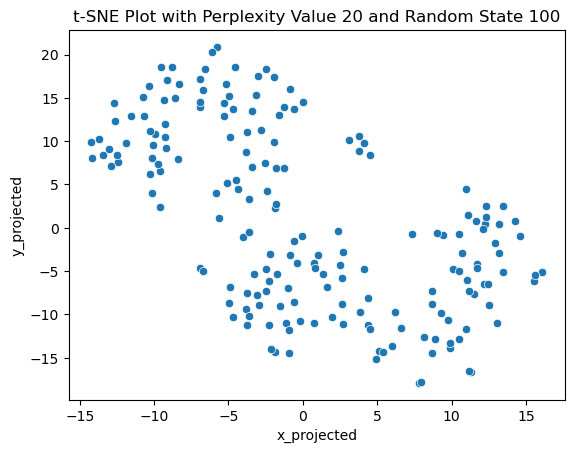

--------------------------------------------


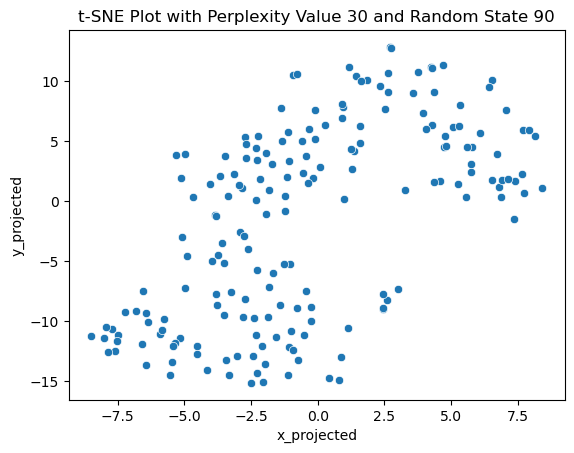

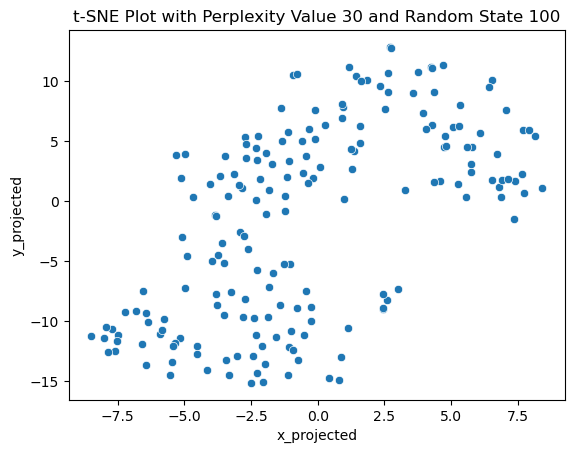

--------------------------------------------


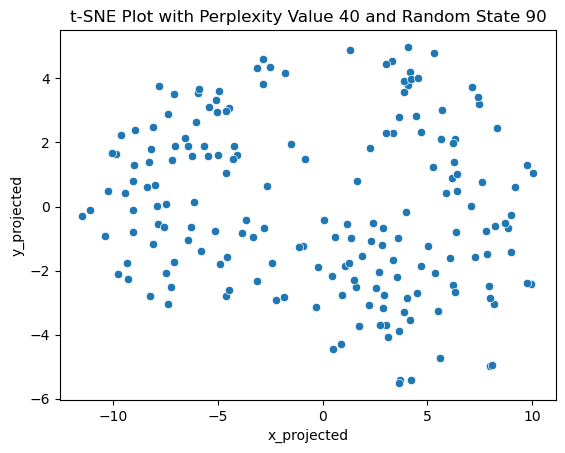

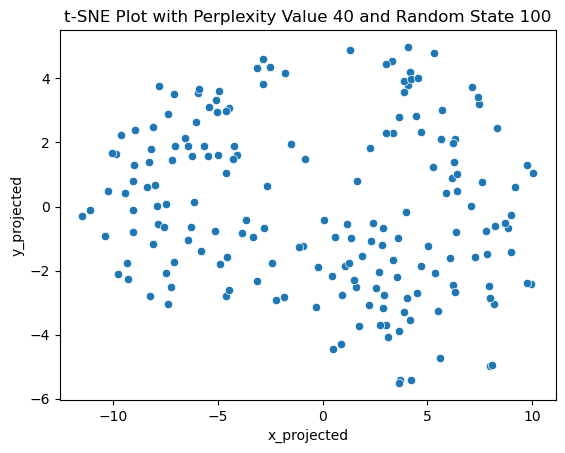

--------------------------------------------


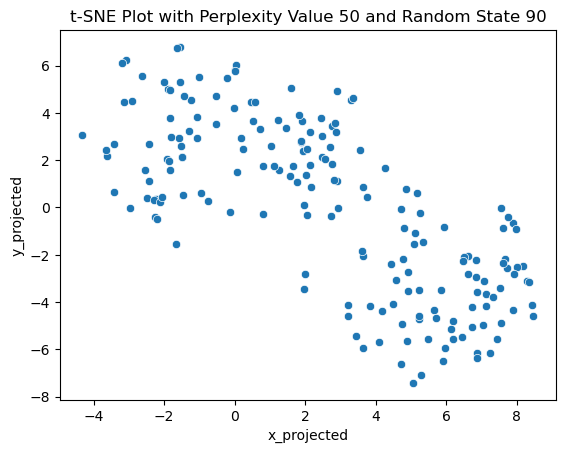

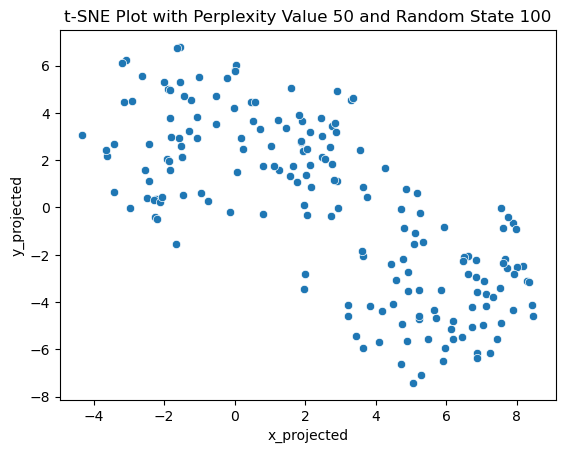

--------------------------------------------


In [ ]:
#using scaled dataset to check for clusterability using t-sne
for perp in [5,10, 20, 30, 40, 50]:
    for rs in [90, 100]:
        tsne = TSNE(n_components=2, perplexity=perp, random_state=rs)
        data_tsne = tsne.fit_transform(X)
        df_tsne = pd.DataFrame(data_tsne, columns=['x_projected', 'y_projected'])
        df_combo = pd.concat([df, df_tsne], axis=1)
        sns.scatterplot(x='x_projected',y='y_projected', data=df_combo)
        plt.title('t-SNE Plot with Perplexity Value %s and Random State %s' %(perp, rs))
        plt.show()
    print('--------------------------------------------')

**Clustering Structure**

We could see from the t-SNE plots that the clusters are not well separated, the shape of the clusters are loosely spherical/oval, there maybe be some not well separated subclusters, but overall it is still clusterable. They are moderately balanced in size. It looks like that there are two or three clusters suggested

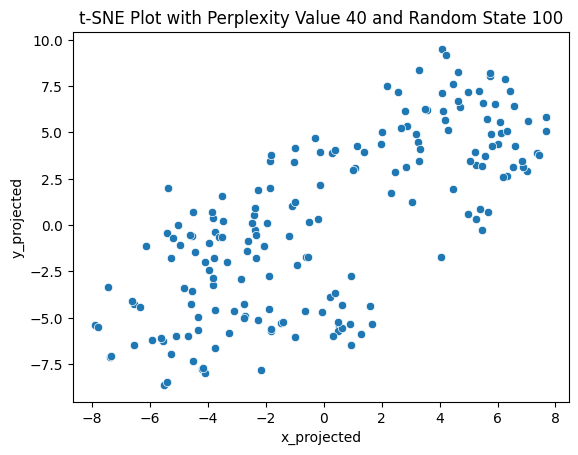

--------------------------------------------


In [ ]:
#selecting a plot
for perp in [40]:
    for rs in [100]:
        tsne = TSNE(n_components=2, perplexity=perp, random_state=rs)
        data_tsne = tsne.fit_transform(X)
        df_tsne = pd.DataFrame(data_tsne, columns=['x_projected', 'y_projected'])
        df_combo = pd.concat([df, df_tsne], axis=1)
        sns.scatterplot(x='x_projected',y='y_projected', data=df_combo)
        plt.title('t-SNE Plot with Perplexity Value %s and Random State %s' %(perp, rs))
        plt.show()
    print('--------------------------------------------')

**Clustering Structure and Attribute Association**

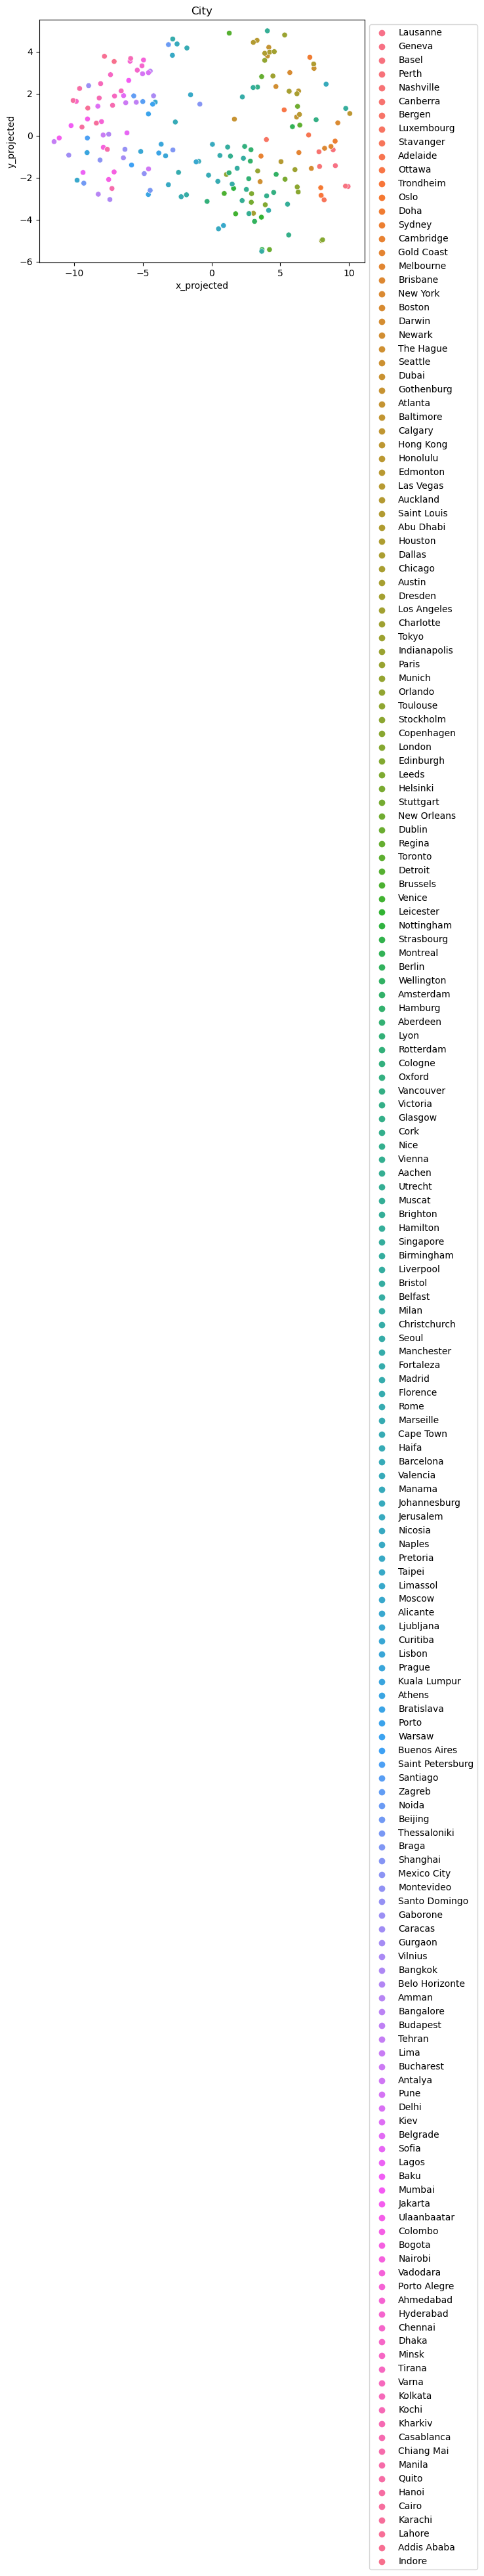

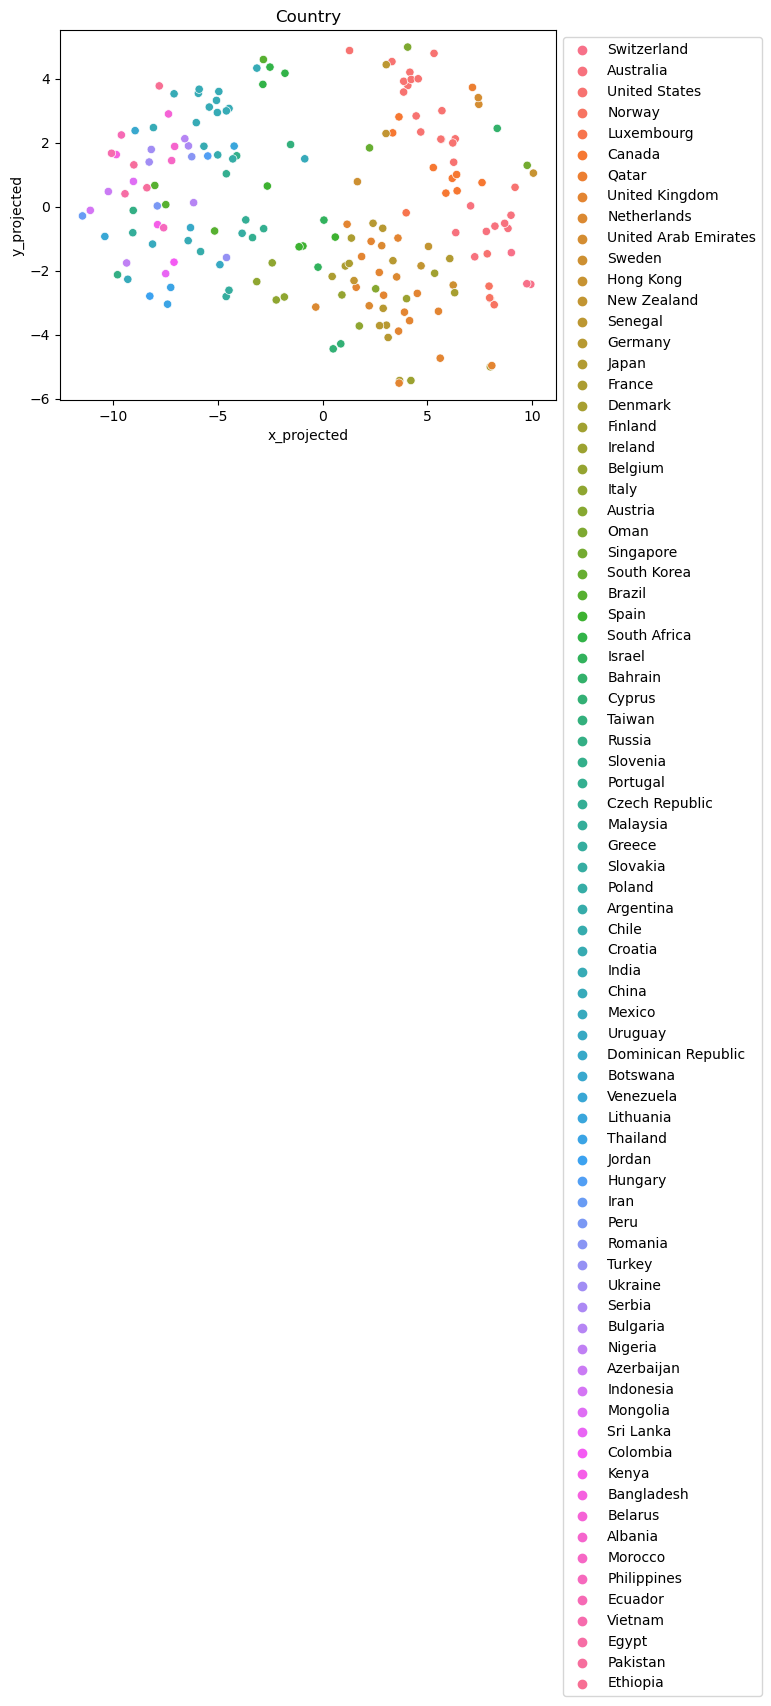

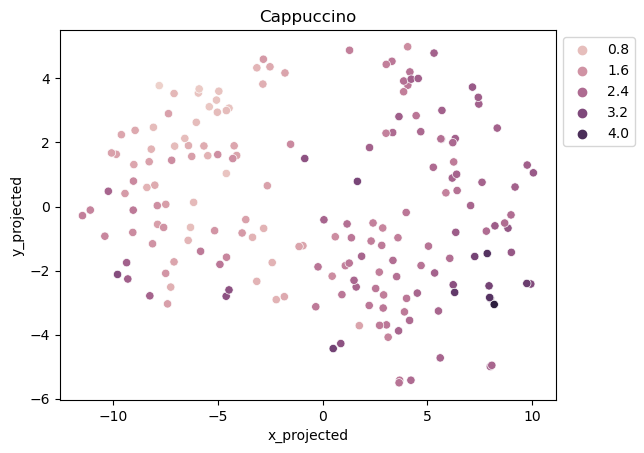

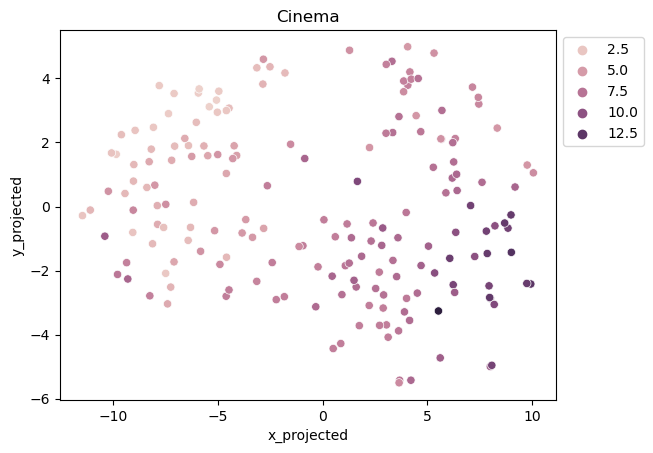

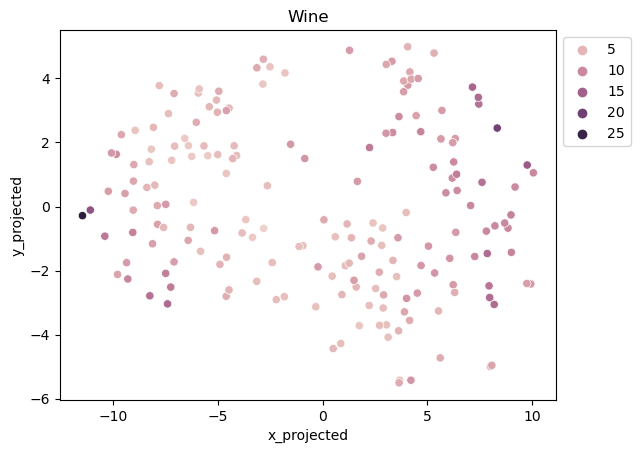

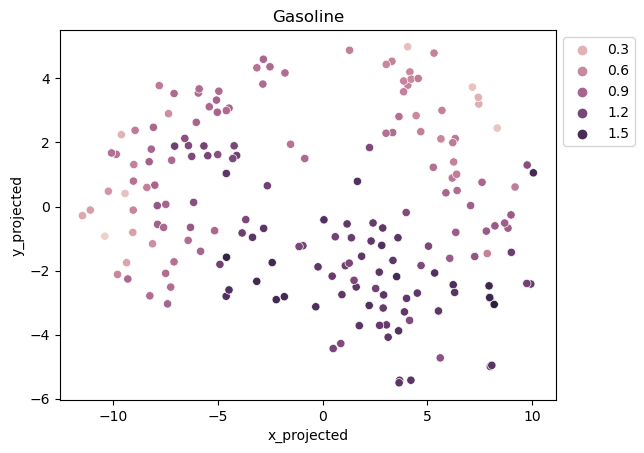

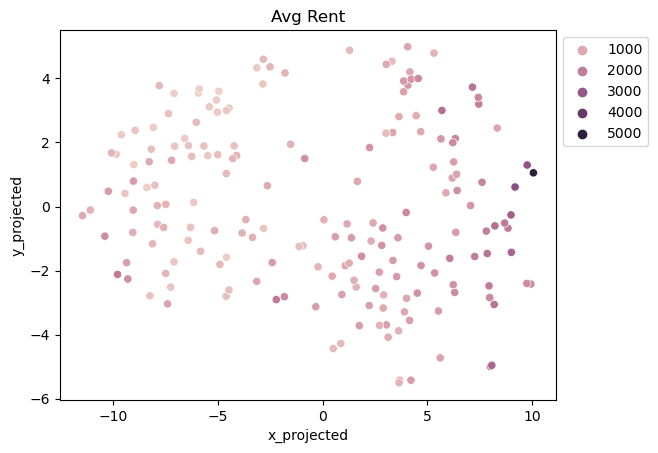

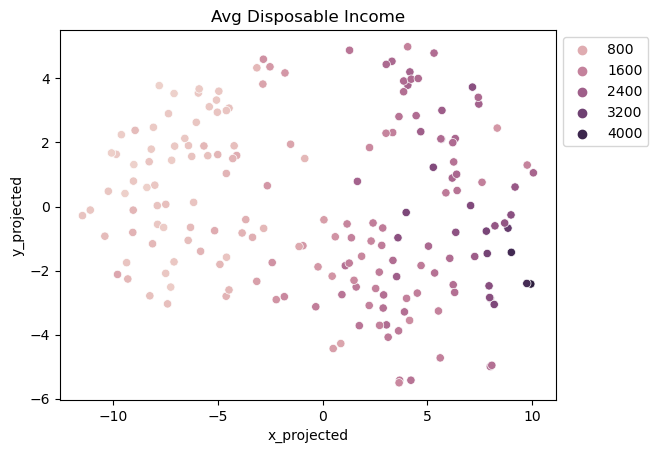

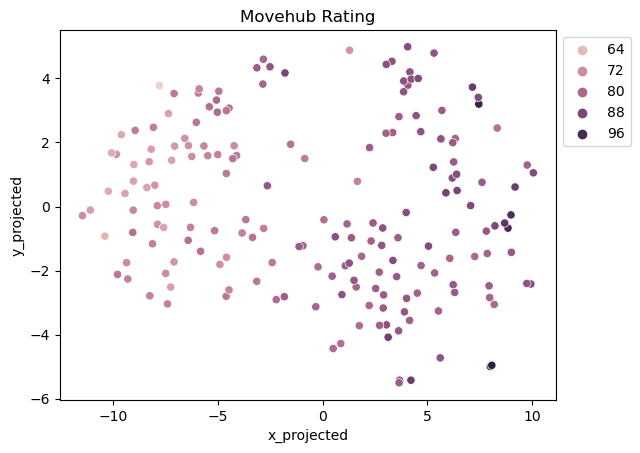

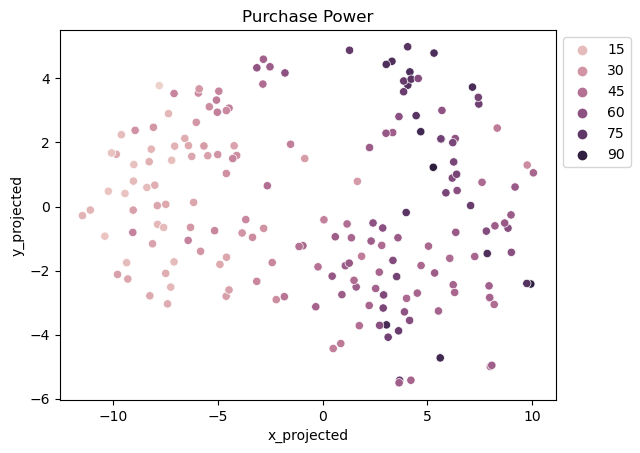

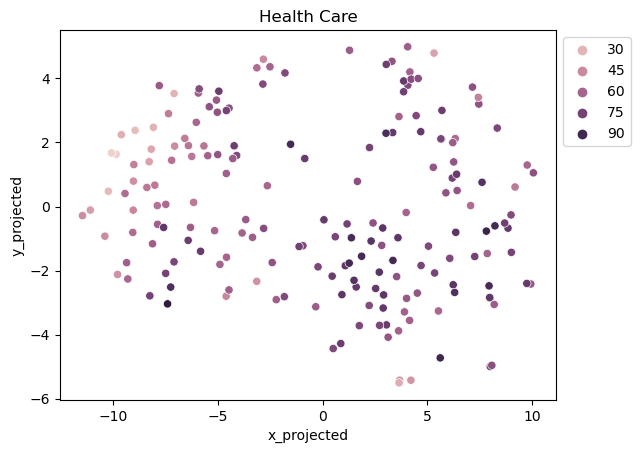

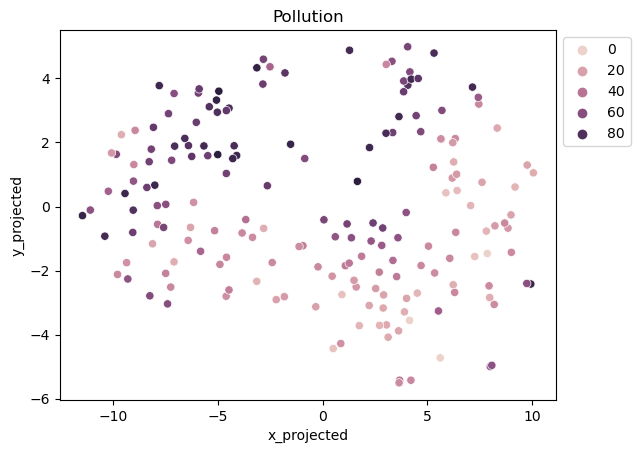

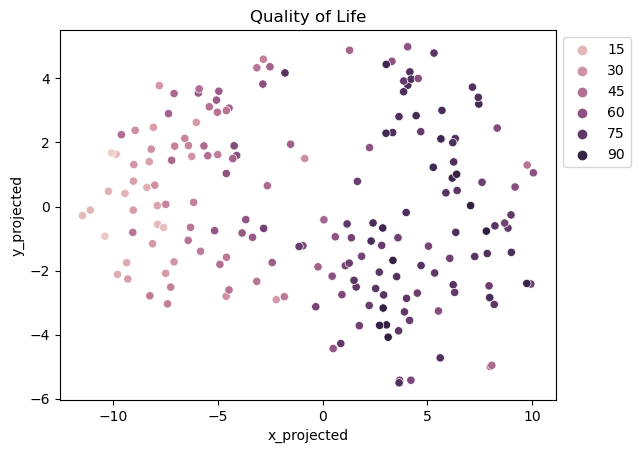

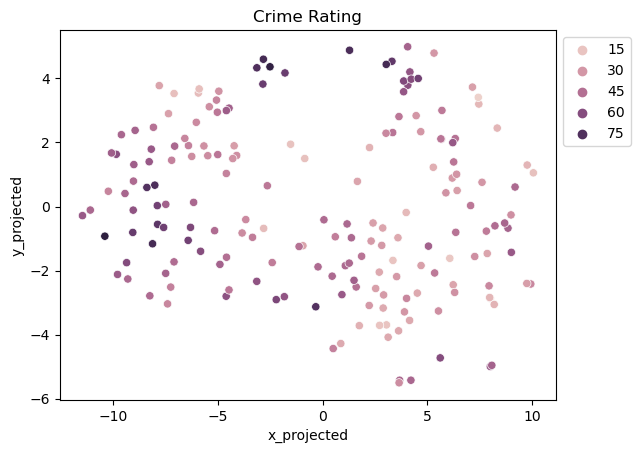

In [ ]:
#Coloring points by column labels
for col in df_combo.columns[0:14]:
    sns.scatterplot(x='x_projected', y='y_projected', hue=col, data=df_combo)
    plt.title(col)
    plt.legend(bbox_to_anchor=(1,1))
    plt.show()

Most of the variables follows the pattern that as they go up linearly their values tend to be smaller

**T-SNE Algorithm Set Backs**

The T-SNE algorithm is not able to detect the distance between objects or clusters of our orginal dataset, centroid or other summary statistics of our original dataset, the sparsity of clusters, and the existence of noise or outkliers in the dataset.

## 7. Clustering Algorithm Selection Motivation

**Clustering Algorithm #1: Hiercharical Average Clustering**

Our dataset is fairly small, so using Hierarchical Clustering helps us avoid unnecessary computations. This method is different from other clustering techniques because it's not random. We're using it to understand how cities in our dataset are related to each other in a nested way. This understanding is important for helping people choose where to move, as it shows which cities are similar. Lastly, it helps us with determining outliers, early in our analysis, we noticed some outliers. With Hierarchical Clustering, we can figure out if these outliers really affect our results.

**Clustering Algorithm #2: K-Means**

Given that our dataset is relatively free from noise and the clusters can be mostly distinguished, we have chosen to run the K-Means algorithm to group cities into clusters with similar characteristics. K-Means is known for its efficiency and simplicity, making it an ideal choice for our analysis. Additionally, while K-Means is capable of handling high-dimensional data, our dataset, with its moderate number of features, is particularly well-suited for this algorithm. There are only two moderate outliers in our dataset. K-Means performs best with minimal outliers, which aligns well with our data. Furthermore, the scale of our dataset is quite uniform, which is beneficial for the application of K-Means.

**Follow Up Questions: Fuzzy Clustering, Hiearchical Clustering?**

With what you have observed about the nature of the dataset clustering structure and your particular research motivation, do you believe that there is any benefit to returning a fuzzy clustering of the dataset? Explain. If so, how might this result be useful with respect to your research motivation?

There is no benefit to returning a fuzzy clustering of the dataset as we

With what you have observed about the nature of the dataset clustering structure and your particular research motivation, do you believe that there is any benefit to returning a hierarchical clustering of the dataset? Explain. If so, how might this result be useful with respect to your research motivation?


## 8. Clustering Algorithm Practical Considerations

**Clustering Algorithm #1: Hieracharical Clustering**

Hieracharical Clustering is deterministic so if there were some additional observations that need to be clustered the whole algorithm would have to be rerun again as the new observations could change the distances the objects are from each other.

**Clustering Algorithm #2: K-Means**
K-Means is a non-deterministic algorithm, so that would mean that there would be different clustering results every time, which could lead to some results being better than others. To handle this, we would set a seed to make sure the results could be replicated and rerun with the same output. If there were new observations that we would like to add to the cluster, we could calculate the distance of the observation to each centroid, and then add it to the centroid with the shortest distance.


## 9. Clustering Algorithm #1


**Parameter Selection**

The parameters used for this clustering algorithm will be chosen by calculating the cophenetic correlation coefficient as it allows us to compare which linkage would be the best.

#### Calculating the Cophenetic Correlation Coefficient

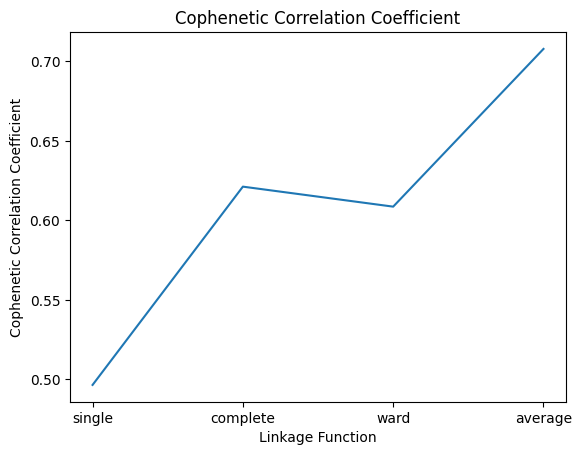

In [ ]:
ccc_list=[]
linkage_list=['single', 'complete', 'ward', 'average']

for link in linkage_list:
    #Create the dendrogram
    dm = pdist(X, metric='euclidean')
    Z = linkage(dm, method=link)

    #Calculate the cophenetic correlation coefficient of the linkage function dendrogram
    ccc, _ = cophenet(Z, dm)
    ccc_list.append(ccc)

#Plot the results
plt.plot(linkage_list, ccc_list)
plt.title('Cophenetic Correlation Coefficient')
plt.xlabel('Linkage Function')
plt.ylabel('Cophenetic Correlation Coefficient')
plt.show()

Average linkage seems to be the best as it has the highest cophenetic correlation.

In [ ]:
Z = linkage(X, method='average')
Z

array([[  6.        ,  11.        ,   0.54656132,   2.        ],
       [ 29.        ,  32.        ,   0.59205637,   2.        ],
       [153.        , 171.        ,   0.63450556,   2.        ],
       [150.        , 167.        ,   0.69965466,   2.        ],
       [119.        , 122.        ,   0.8061388 ,   2.        ],
       [ 28.        ,  48.        ,   0.81274614,   2.        ],
       [166.        , 188.        ,   0.83689652,   3.        ],
       [ 72.        ,  82.        ,   0.89440424,   2.        ],
       [ 49.        ,  73.        ,   0.89839608,   2.        ],
       [165.        , 173.        ,   0.92177946,   2.        ],
       [ 56.        ,  83.        ,   0.93467151,   2.        ],
       [ 24.        ,  40.        ,   0.94881647,   2.        ],
       [148.        , 187.        ,   0.95854987,   3.        ],
       [118.        , 189.        ,   0.96326281,   3.        ],
       [152.        , 174.        ,   0.97255515,   2.        ],
       [ 37.        , 190

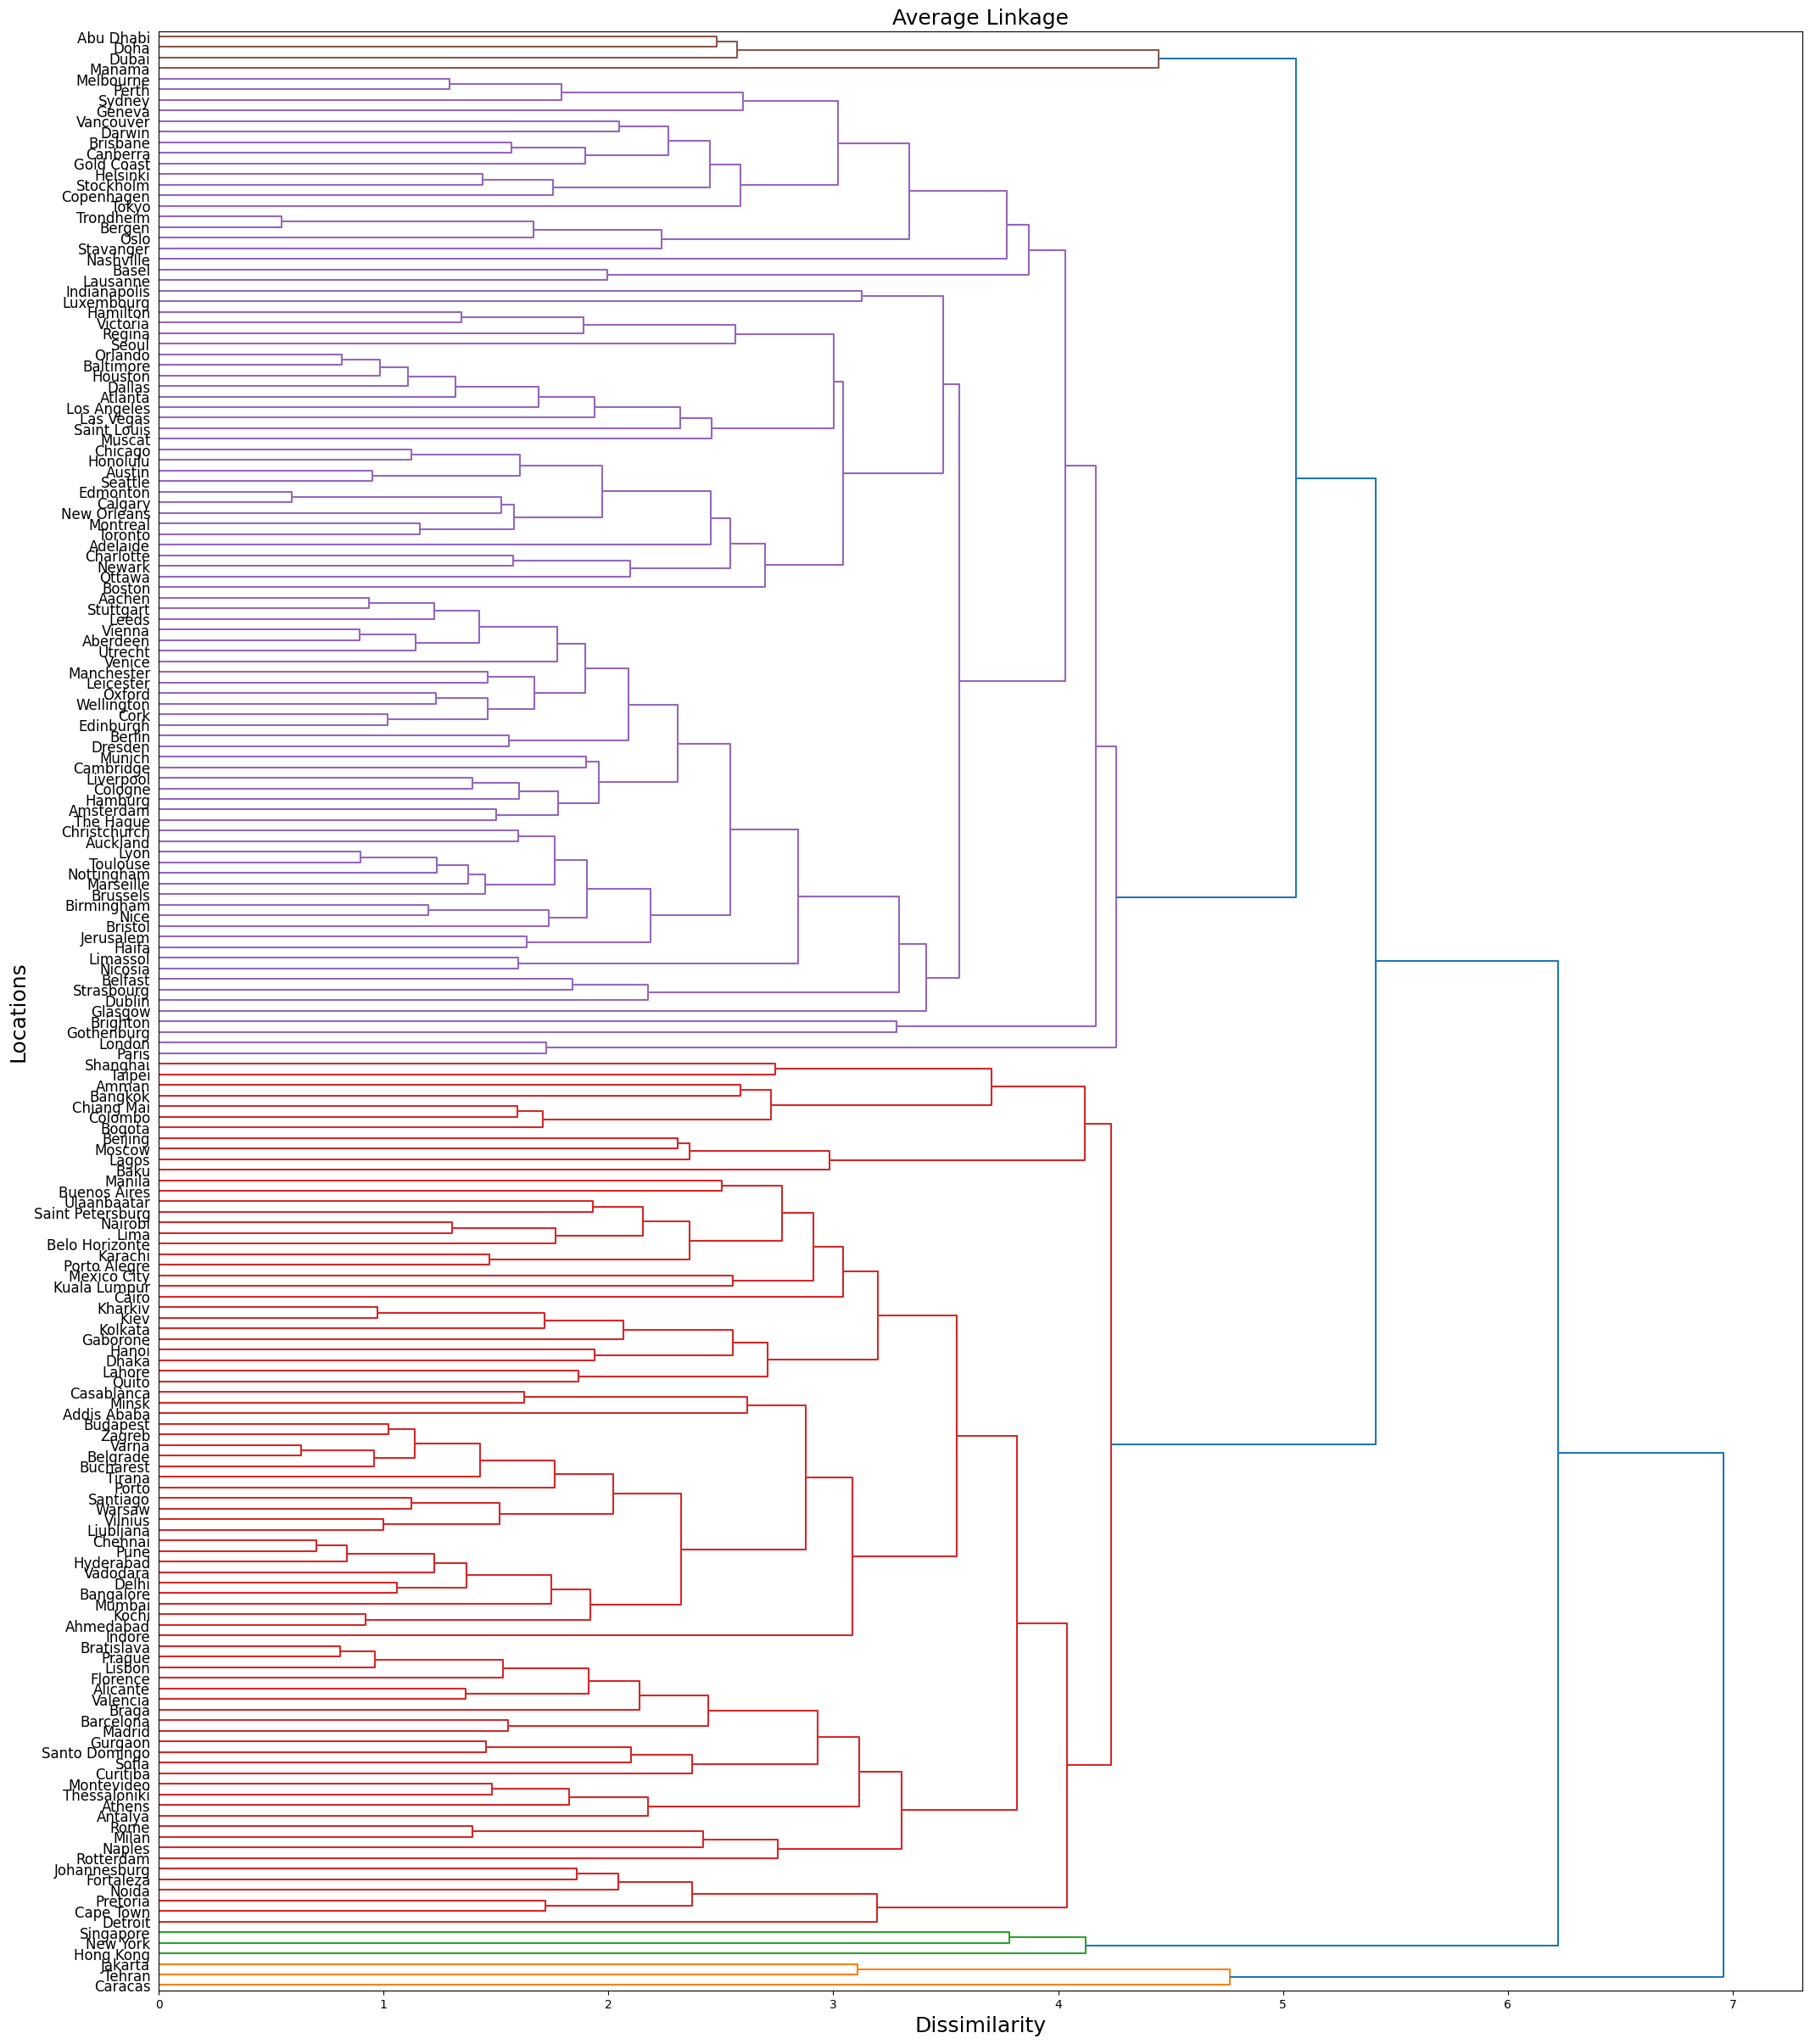

In [ ]:
fig, ax = plt.subplots(figsize=(25, 30))
d = dendrogram(Z, orientation='right', ax=ax, truncate_mode='lastp', p=200, labels = df['City'].array)
ax.set_xlabel('Dissimilarity', fontsize=18)
ax.set_ylabel('Locations', fontsize=18)
plt.yticks(fontsize=12)
plt.title('Average Linkage', fontsize=18)
plt.show()

In this dendrogram, the clusters are roughly balanced in size, although it did detect a few outliers. This dendrogram shows which cities are similar to each other in attributes and eventually what cluster they would eventually end up in.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


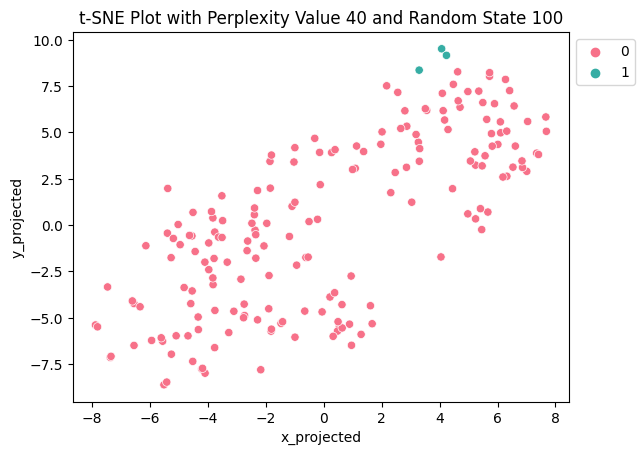

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


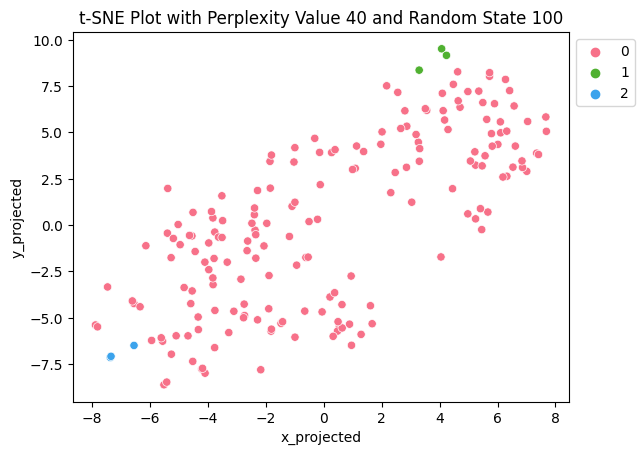

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


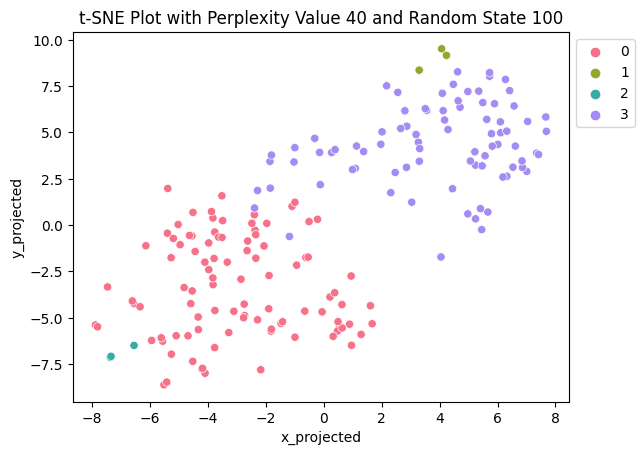

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


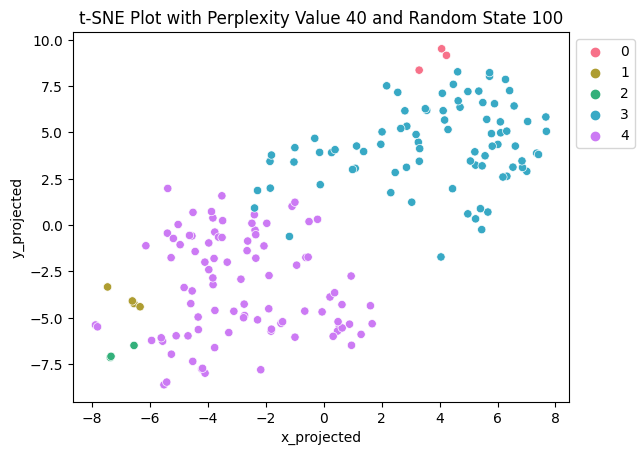

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


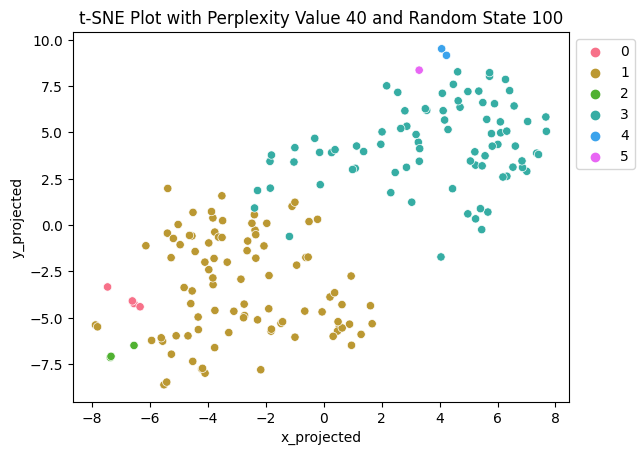

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


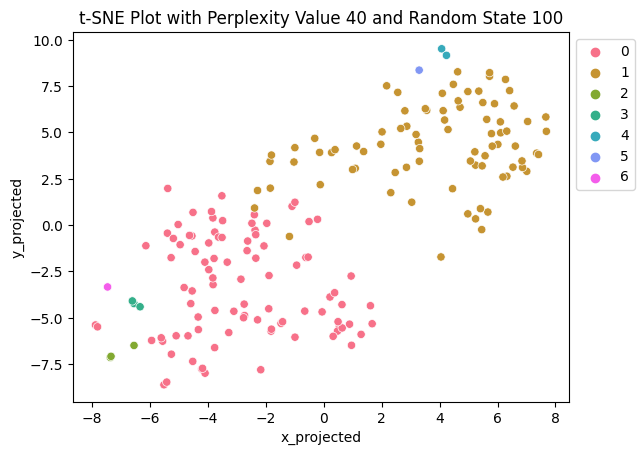

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


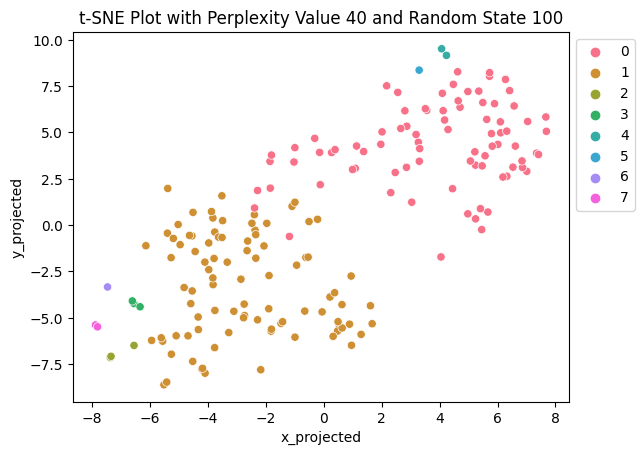

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


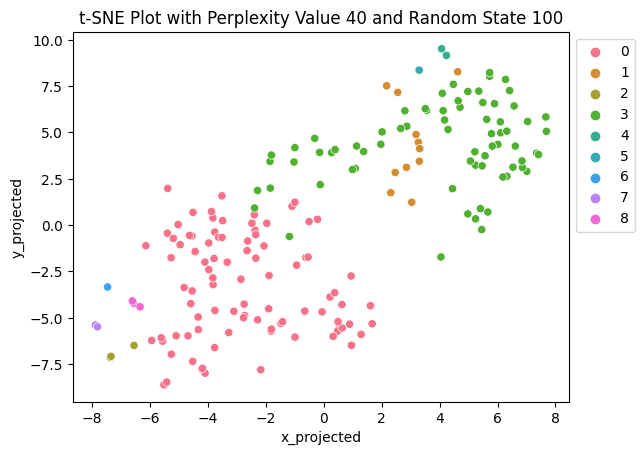

In [ ]:
for k in range(2,10):
    #Clustering from dendrogram with k clusters
    hac = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='average')
    df_combo['predicted_cluster'] = hac.fit_predict(X)

    #Map the resulting cluster labels onto our chosen t-SNE plot
    sns.scatterplot(x='x_projected',y='y_projected', hue='predicted_cluster', palette=sns.color_palette("husl", k), data=df_combo)
    plt.title('t-SNE Plot with Perplexity Value %s and Random State %s' %(40, 100))
    plt.legend(bbox_to_anchor=(1,1))
    plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


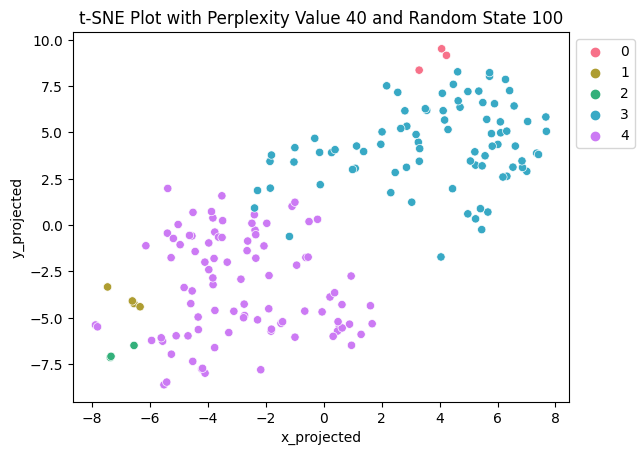

In [ ]:
# Selected a Plot that Matched the most to the t-SNE plots
for k in range(5,6):
    #Clustering from dendrogram with k clusters
    hac = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='average')
    df_combo['predicted_cluster'] = hac.fit_predict(X)

    #Map the resulting cluster labels onto our chosen t-SNE plot
    sns.scatterplot(x='x_projected',y='y_projected', hue='predicted_cluster', palette=sns.color_palette("husl", k), data=df_combo)
    plt.title('t-SNE Plot with Perplexity Value %s and Random State %s' %(40, 100))
    plt.legend(bbox_to_anchor=(1,1))
    plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


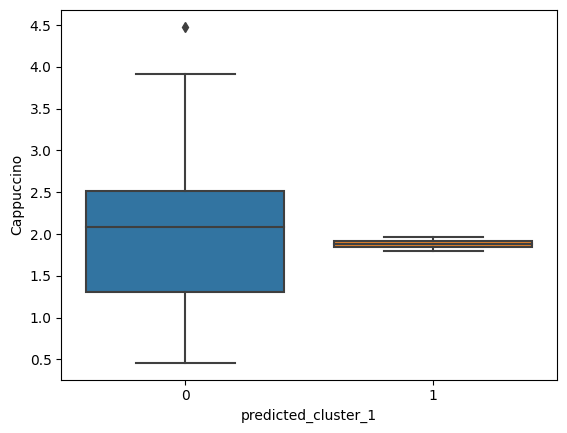

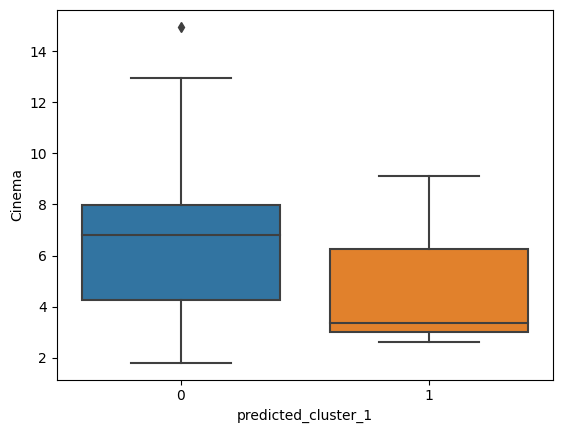

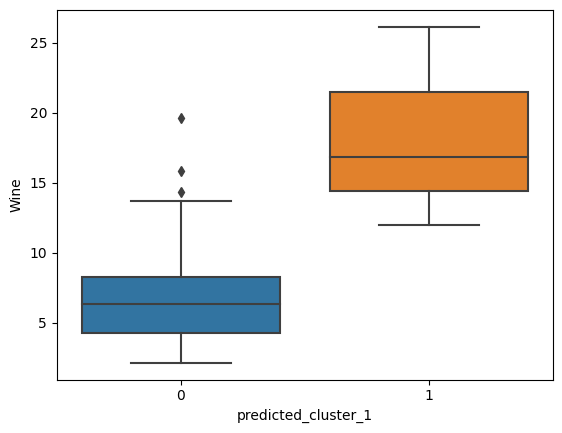

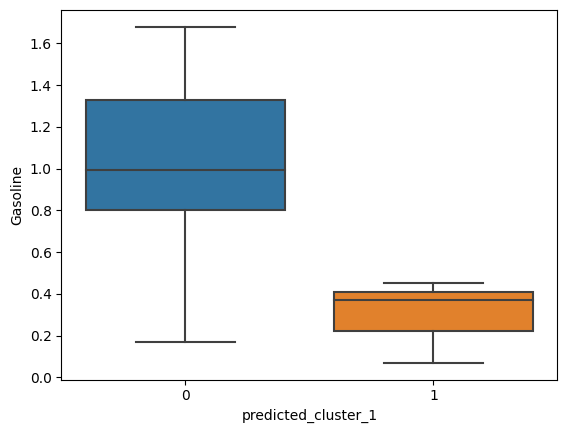

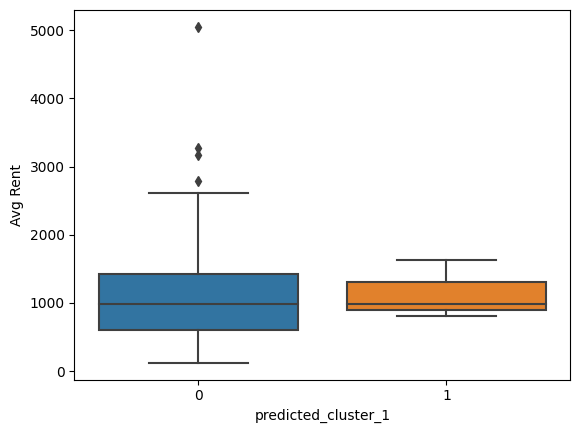

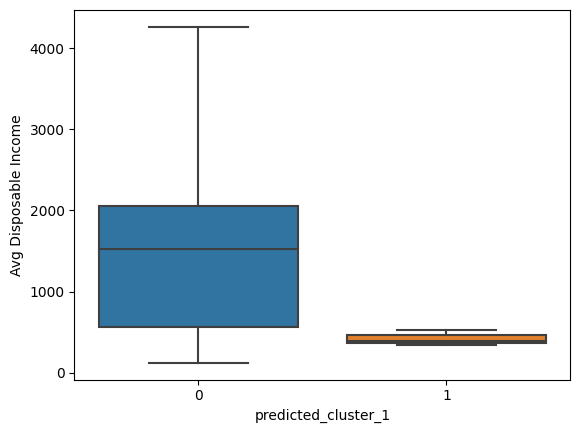

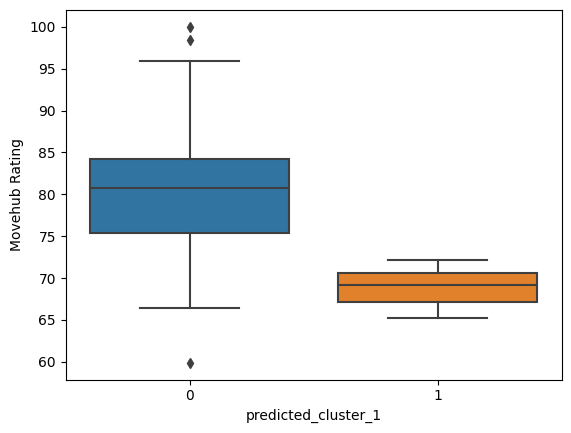

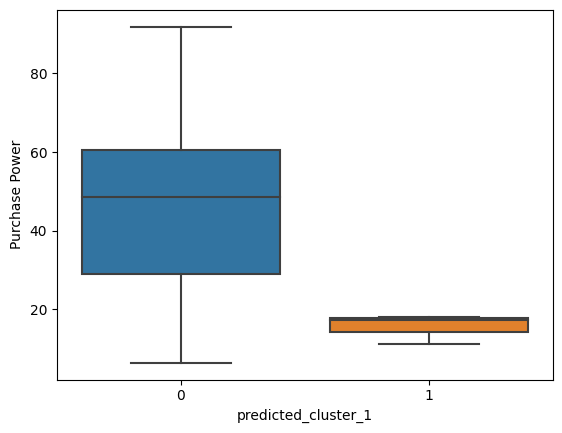

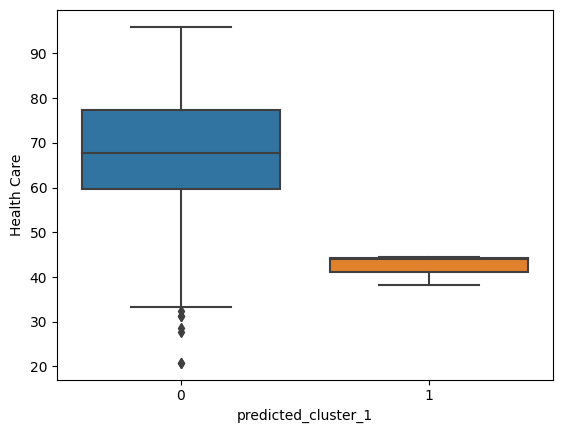

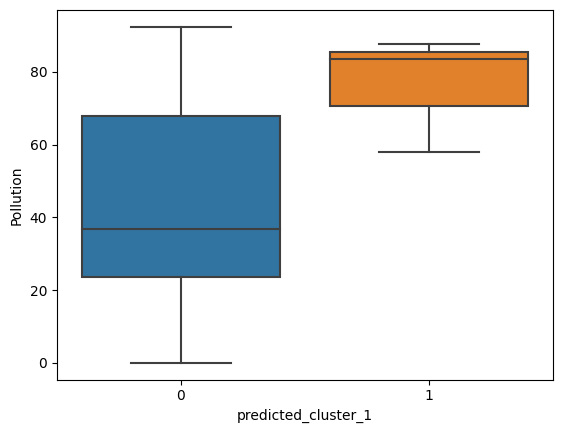

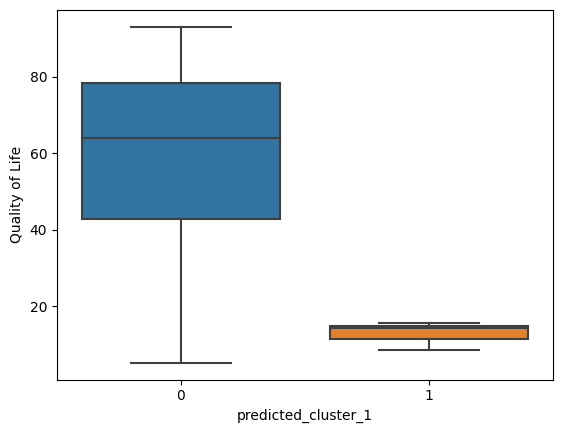

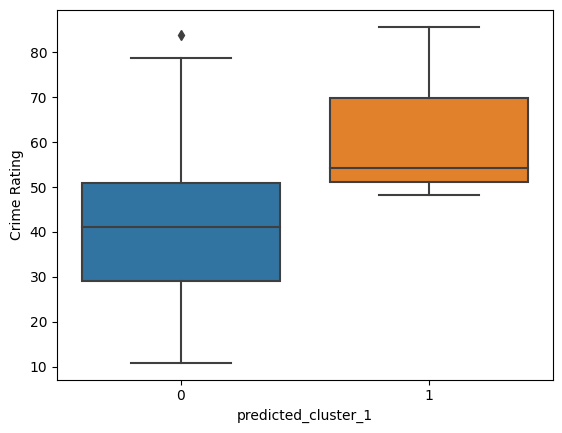

In [ ]:
hac = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='average')
df['predicted_cluster_1'] = hac.fit_predict(X)
for col in df.columns[2:14]:
    sns.boxplot(x="predicted_cluster_1", y=col, data=df)
    plt.show()

In [ ]:
df_sort=df_combo.sort_values(by=['predicted_cluster'])
df_sort

City         Country  Cappuccino  Cinema   Wine  Gasoline  \
138     Caracas       Venezuela        1.80    9.12  11.97      0.07   
158     Jakarta       Indonesia        1.88    3.37  16.83      0.45   
146      Tehran            Iran        1.96    2.62  26.15      0.37   
13         Doha           Qatar        2.78    6.28  14.32      0.18   
106      Manama         Bahrain        2.60    5.20  19.61      0.17   
..          ...             ...         ...     ...    ...       ...   
66   Strasbourg          France        2.13    7.25   4.26      1.32   
67     Montreal          Canada        1.91    7.65   9.56      0.89   
68       Berlin         Germany        1.88    6.82   3.84      1.36   
59       Regina          Canada        2.65    7.65   9.56      0.80   
92      Belfast  United Kingdom        2.19    5.98   6.22      1.39   

     Avg Rent  Avg Disposable Income  Movehub Rating  Purchase Power  \
138   1634.42                 527.89           65.18           11.25   
158    807.70                 336.54           69.15           17.38   
146    980.65                 392.26           72.13           18.09   
13    2221.74                2775.58           90.73           81.96   
106   1078.72                1176.78           77.56           40.26   
..        ...                    ...             ...             ...   
66     937.73                1790.21           84.18           72.23   
67     956.27                1785.03           89.28           66.99   
68     916.42                1772.57           89.54           68.72   
59     956.27                1912.54           82.07           60.80   
92     807.12                1494.67           82.15           52.80   

     Health Care  Pollution  Quality of Life  Crime Rating  \
138        44.44      83.45             8.61         85.70   
158        38.33      57.91            15.66         48.27   
146        43.98      87.62            14.33         54.16   
13         68.06      83.45            80.28         27.17   
106        72.22      17.06            63.85         19.79   
..           ...        ...              ...           ...   
66         42.81      39.91            66.50         47.27   
67         66.77       6.27            78.55         31.63   
68         65.48      16.05            91.17         24.18   
59         60.24      84.07            79.98         41.56   
92         33.33      29.24            80.55         34.06   

     predicted_cluster_1  x_projected  y_projected  predicted_cluster  
138                    1     3.293391     8.365480                  0  
158                    1     4.236132     9.163598                  0  
146                    1     4.070135     9.517858                  0  
13                     0    -6.557931    -4.234989                  1  
106                    0    -7.471274    -3.337806                  1  
..                   ...          ...          ...                ...  
66                     0    -0.620514    -1.745381                  4  
67                     0    -2.752275    -4.264528                  4  
68                     0    -5.198428    -0.719185                  4  
59                     0     0.626704    -4.290650                  4  
92                     0    -0.541906    -1.727489                  4  

[185 rows x 18 columns]

In [ ]:
df_sort = df_sort.drop(['City','Country','x_projected','y_projected', 'predicted_cluster'], axis=1)
df_sort

Cappuccino  Cinema   Wine  Gasoline  Avg Rent  Avg Disposable Income  \
138        1.80    9.12  11.97      0.07   1634.42                 527.89   
158        1.88    3.37  16.83      0.45    807.70                 336.54   
146        1.96    2.62  26.15      0.37    980.65                 392.26   
13         2.78    6.28  14.32      0.18   2221.74                2775.58   
106        2.60    5.20  19.61      0.17   1078.72                1176.78   
..          ...     ...    ...       ...       ...                    ...   
66         2.13    7.25   4.26      1.32    937.73                1790.21   
67         1.91    7.65   9.56      0.89    956.27                1785.03   
68         1.88    6.82   3.84      1.36    916.42                1772.57   
59         2.65    7.65   9.56      0.80    956.27                1912.54   
92         2.19    5.98   6.22      1.39    807.12                1494.67   

     Movehub Rating  Purchase Power  Health Care  Pollution  Quality of Life  \
138           65.18           11.25        44.44      83.45             8.61   
158           69.15           17.38        38.33      57.91            15.66   
146           72.13           18.09        43.98      87.62            14.33   
13            90.73           81.96        68.06      83.45            80.28   
106           77.56           40.26        72.22      17.06            63.85   
..              ...             ...          ...        ...              ...   
66            84.18           72.23        42.81      39.91            66.50   
67            89.28           66.99        66.77       6.27            78.55   
68            89.54           68.72        65.48      16.05            91.17   
59            82.07           60.80        60.24      84.07            79.98   
92            82.15           52.80        33.33      29.24            80.55   

     Crime Rating  predicted_cluster_1  
138         85.70                    1  
158         48.27                    1  
146         54.16                    1  
13          27.17                    0  
106         19.79                    0  
..            ...                  ...  
66          47.27                    0  
67          31.63                    0  
68          24.18                    0  
59          41.56                    0  
92          34.06                    0  

[185 rows x 13 columns]

In [ ]:
dist_mat = squareform(pdist(df_sort))

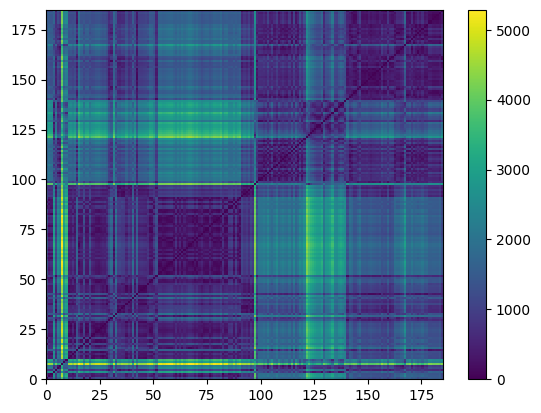

In [ ]:
plt.pcolormesh(dist_mat)
plt.colorbar()
N = len(df_sort)
plt.xlim([0,N])
plt.ylim([0,N])
plt.show()

In [ ]:
df_combo['predicted_cluster'].value_counts().sort_index().cumsum()

0      3
1      7
2     10
3     92
4    185
Name: predicted_cluster, dtype: int64

In [ ]:
#Find the maximum distance in the distance matrix
min_dist=np.min(dist_mat)
#"Find" the minimum distance in the distance matrix (this will be 0) from the diagonals... ie. the distance between an object and itself is 0.
max_dist=np.max(dist_mat)

#Similarity matrix
sim_mat=1-(dist_mat-min_dist)/(max_dist-min_dist)
sim_mat

array([[1.        , 0.83923391, 0.87350471, ..., 0.72690908, 0.70774003,
        0.75834633],
       [0.83923391, 1.        , 0.9650879 , ..., 0.72679781, 0.70011815,
        0.78037466],
       [0.87350471, 0.9650879 , 1.        , ..., 0.7375426 , 0.71195561,
        0.78805391],
       ...,
       [0.72690908, 0.72679781, 0.7375426 , ..., 1.        , 0.96925725,
        0.94296704],
       [0.70774003, 0.70011815, 0.71195561, ..., 0.96925725, 1.        ,
        0.91525214],
       [0.75834633, 0.78037466, 0.78805391, ..., 0.94296704, 0.91525214,
        1.        ]])

Cluster Sizes
0     3
1     4
2     3
3    82
4    93
Name: predicted_cluster, dtype: int64

Cluster Size: 3
Cluster Size: 4
Cluster Size: 3
Cluster Size: 82
Cluster Size: 93



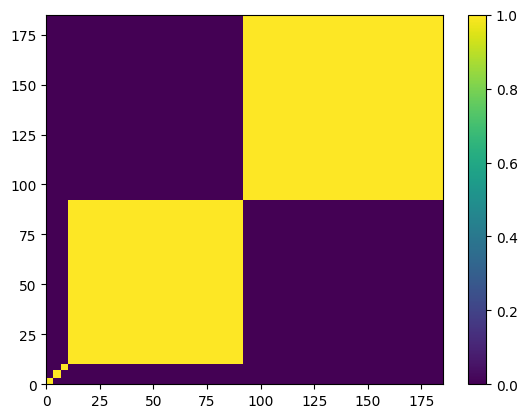

In [ ]:
#Count the number of objects in each cluster, and sort by cluster label.
cluster_sizes=df_combo['predicted_cluster'].value_counts().sort_index()
print('Cluster Sizes')
print(cluster_sizes)
print()

#Create a list of square matrices with all ones, each matrix is the size of a cluster.
block_list=[]
for i in cluster_sizes:
    print('Cluster Size:',i)
    block=np.ones((i,i)).tolist()
    block_list.append(block)

#Put these square matrices on the block diagonal of an otherwise 0-matrix
print()
ideal_sim_mat=block_diag(block_list[0], block_list[1], block_list[2], block_list[3], block_list[4])
ideal_sim_mat
#Then visualize the distance matrix with a heat map.
plt.pcolormesh(ideal_sim_mat)
plt.colorbar()
N = len(df_sort)
plt.xlim([0,N])
plt.ylim([0,N])
plt.show()

Clusters are not very far apart from each other according to the cluster-sorted simularity matrix.

In [ ]:
flat_sim_mat=sim_mat.flatten()
print('Flattened Actual Scaled Similarity Matrix')
print(flat_sim_mat)

flat_ideal_sim_mat=ideal_sim_mat.flatten()
print('Flattened Ideal Scaled Similarity Matrix')
print(flat_ideal_sim_mat)

Flattened Actual Scaled Similarity Matrix
[1.         0.83923391 0.87350471 ... 0.94296704 0.91525214 1.        ]
Flattened Ideal Scaled Similarity Matrix
[1. 1. 1. ... 1. 1. 1.]


In [ ]:
np.corrcoef(flat_sim_mat,flat_ideal_sim_mat)

array([[1.        , 0.55227767],
       [0.55227767, 1.        ]])

A score of 0.552 is somewhat high, this means that the clusters have a medium amount of cohesion and separation.

In [ ]:
def show_silhouette_plots(X,cluster_labels):

    # This package allows us to use "color maps" in our visualizations
    import matplotlib.cm as cm

    #How many clusters in your clustering?
    n_clusters=len(np.unique(cluster_labels))

    # Create a subplot with 1 row and 2 columns
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient fcan range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])


    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]


        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])


    plt.show()

    return

In [ ]:
X["predicted_cluster"] = df_combo["predicted_cluster"]

For n_clusters = 5 The average silhouette_score is : 0.30510536835535534


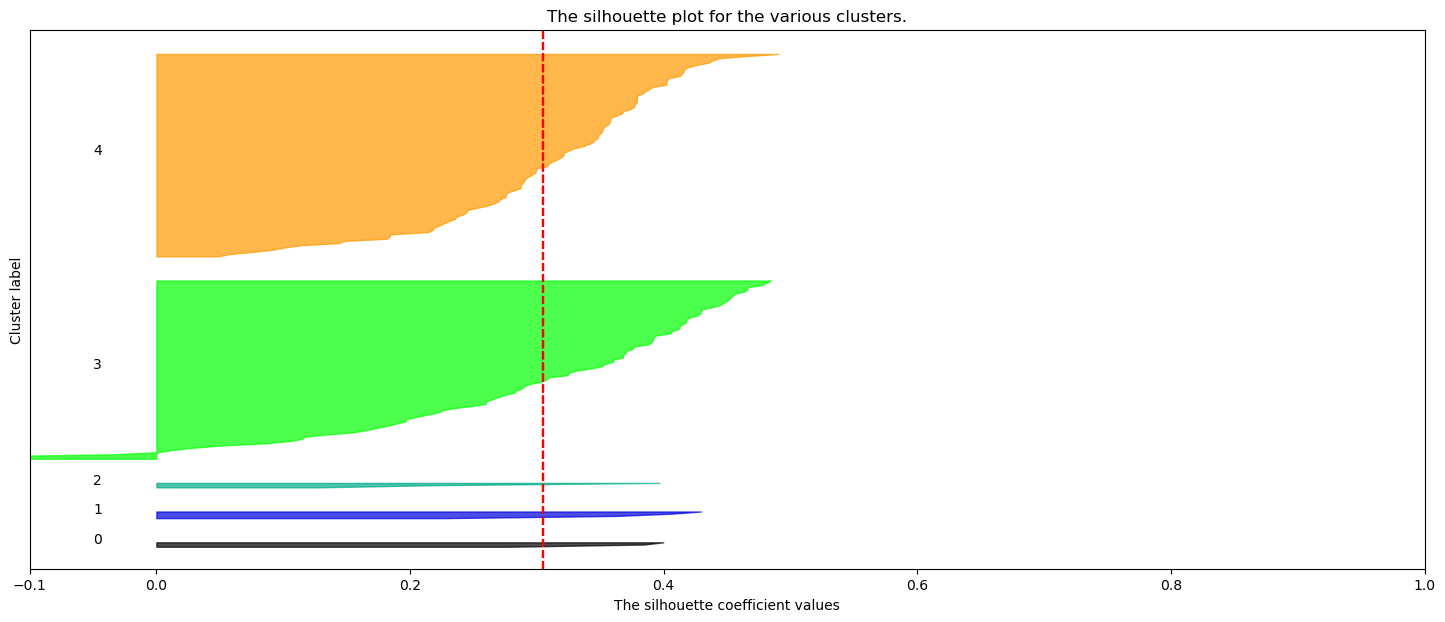

In [ ]:
show_silhouette_plots(X, X['predicted_cluster'])

The silhouette plot shows a rapid drop off for cluster label 0, 1, and 2. Cluster 3 shows that there are a few poorly matched objects.


## 10. Clustering Algorithm #2

**Parameter Selection**

Number of clusters, selected, why, t-sne plot, using perp and random values ___

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


---------
Clusterings with k=1 Clusters
Inertia: 237463945.3537923
Inertia: 237463945.3537923
Inertia: 237463945.3537923
Average inertia:237463945.3537923
---------
Clusterings with k=2 Clusters
Inertia: 92965415.02704819
Inertia: 92965415.02704819
Inertia: 92965415.02704819
Average inertia:92965415.02704819
---------
Clusterings with k=3 Clusters
Inertia: 56679234.86405189
Inertia: 56709502.77643804
Inertia: 56685154.961848944
Average inertia:56691297.53411296
---------
Clusterings with k=4 Clusters
Inertia: 45858283.934006885
Inertia: 47475153.241738394
Inertia: 45891637.40117875
Average inertia:46408358.19230801
---------
Clusterings with k=5 Clusters
Inertia: 37698819.70624115
Inertia: 37727237.72741973
Inertia: 38174326.180361316
Average inertia:37866794.5380074
---------
Clusterings with k=6 Clusters
Inertia: 31369470.88063772
Inertia: 31198277.672212638
Inertia: 31372111.535683274
Average inertia:31313286.69617788
---------
Clusterings with k=7 Clusters
Inertia: 27219316.0912553

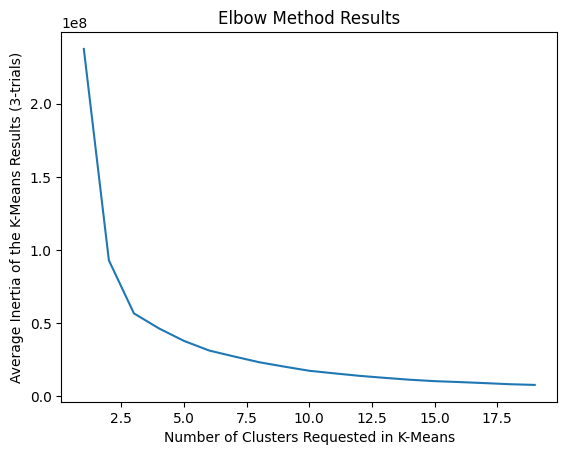

In [ ]:
#kmeans=KMeans(n_clusters=2).fit(df)
#warnings.filterwarnings('ignore')

kmeans=KMeans(n_clusters=2).fit(X)
warnings.filterwarnings('ignore')

avg_inertia_list=[]
for k in range(1,20):
    print('---------')
    print('Clusterings with k='+str(k)+' Clusters')
    sub_inertia_list=[]
    for i in range(0,3):
        kmeans=KMeans(n_clusters=k).fit(dropped_df)
        sub_inertia_list.append(kmeans.inertia_)
        print('Inertia: ' +str(kmeans.inertia_))
    avg_inertia_list.append(np.average(sub_inertia_list))
    print('Average inertia:' +str(np.average(sub_inertia_list)))

plt.plot(range(1,20),avg_inertia_list)
plt.xlabel('Number of Clusters Requested in K-Means')
plt.ylabel('Average Inertia of the K-Means Results (3-trials)')
plt.title('Elbow Method Results')
plt.show()

We should use 3 clusters as that is where the elbow plot starts to level off.


In [77]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=3, random_state=100).fit(X)
warnings.filterwarnings('ignore')
df_combo['predicted_cluster']=kmeans.labels_
df_combo

Cappuccino  Cinema   Wine  Gasoline  Avg Rent  Avg Disposable Income  \
0          3.15   12.59   8.40      1.32   1714.00                4266.11   
1          2.80   12.94  10.49      1.28   2607.95                3917.72   
2          3.50   11.89   7.35      1.25   1649.29                3847.76   
3          2.87   11.43  10.08      0.97   2083.14                3358.55   
4          3.84   12.00  13.50      0.65   2257.14                3089.75   
..          ...     ...    ...       ...       ...                    ...   
180        1.42    3.27   7.33      0.19    425.85                 163.44   
181        1.00    3.27   5.11      0.67    197.78                 139.60   
182        1.23    3.27   6.54      0.66    206.08                 132.95   
183        0.46    2.29   4.18      0.72    653.77                 124.22   
184        0.91    2.23   6.03      0.84    205.15                 120.68   

     Movehub Rating  Purchase Power  Health Care  Pollution  Quality of Life  \
0             87.21           90.77        65.85      87.62            73.21   
1             83.27           61.22        74.88      29.43            82.76   
2             84.20           78.17        79.74      59.18            88.27   
3             95.38           62.11        80.56      23.53            74.62   
4             80.61           80.30        60.30       0.00            80.50   
..              ...             ...          ...        ...              ...   
180           67.93           11.90        56.48      86.16            17.25   
181           67.81           14.63        51.57      69.63            18.50   
182           67.32           12.45        48.94      30.55            28.52   
183           59.88            6.38        63.89      85.59            28.41   
184           76.38           35.79        31.34      59.42            48.53   

     Crime Rating  predicted_cluster_1  x_projected  y_projected  \
0           35.55                    0    -5.523213    -8.618371   
1           54.36                    0    -5.266873    -6.967218   
2           28.12                    0    -5.427568    -8.473401   
3           50.01                    0    -5.569315    -6.265564   
4           25.50                    0    -3.771286    -6.613028   
..            ...                  ...          ...          ...   
180         48.81                    0     4.473866     7.598765   
181         74.36                    0     4.641308     6.709373   
182         51.98                    0     5.353070     7.232465   
183         26.04                    0     7.669708     5.836791   
184         16.93                    0     7.687925     5.062364   

     predicted_cluster  
0                    0  
1                    0  
2                    0  
3                    0  
4                    0  
..                 ...  
180                  1  
181                  1  
182                  1  
183                  1  
184                  1  

[185 rows x 16 columns]

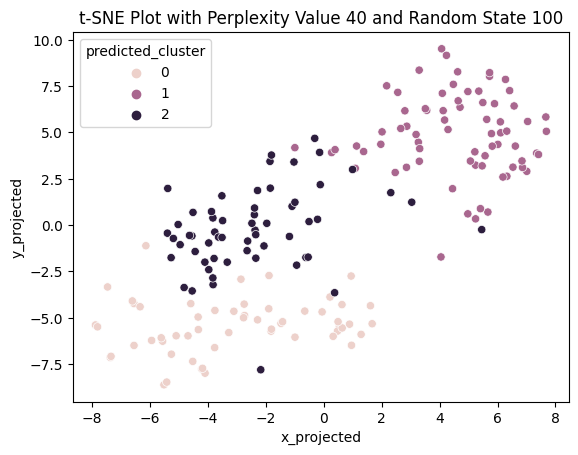

--------------------------------------------


In [72]:
for perp in [40]:
    for rs in [100]:
        tsne = TSNE(n_components=2, perplexity=perp, random_state=rs)
        data_tsne = tsne.fit_transform(X)
        df_tsne = pd.DataFrame(data_tsne, columns=['x_projected', 'y_projected'])
        #df_combo = pd.concat([df, df_tsne], axis=1)
        sns.scatterplot(x='x_projected',y='y_projected', hue='predicted_cluster', data=df_combo)
        plt.title('t-SNE Plot with Perplexity Value %s and Random State %s' %(perp, rs))
        plt.show()
    print('--------------------------------------------')

In [68]:
# drop city and country
df_combo = df_combo.drop(['City','Country'], axis=1)
cluster_summary = df_combo.groupby('predicted_cluster').mean()
cluster_summary

KeyError: ignored

In [ ]:
cluster_summary = df_combo.groupby('predicted_cluster').mean()
print(cluster_summary)

                   Cappuccino    Cinema      Wine  Gasoline     Avg Rent  \
predicted_cluster                                                          
0                    2.107931  7.572241  5.429310  1.314828  1087.142931   
1                    1.376761  3.979577  6.389437  0.877324   626.153521   
2                    2.606429  8.457321  9.535357  0.875179  1714.300000   

                   Avg Disposable Income  Movehub Rating  Purchase Power  \
predicted_cluster                                                          
0                            1570.649655       81.630172       50.641207   
1                             476.271972       73.299155       26.354225   
2                            2373.952857       85.525893       64.712679   

                   Health Care  Pollution  Quality of Life  Crime Rating  \
predicted_cluster                                                          
0                    72.493276  35.634310        69.756724     35.305172   
1         

In [ ]:
df_combo['City'] = df['City']
df_combo['Country'] = df['Country']

clustered_data = df_combo.groupby('predicted_cluster')[['City', 'Country']].apply(lambda x: x.reset_index(drop=True)).reset_index()
clustered_data.drop('level_1', axis=1, inplace=True)

clustered_data

def print_top_five_per_cluster(clustered_df):
    clusters = clustered_df['predicted_cluster'].unique()
    for cluster in clusters:
        print(f"Cluster {cluster}:")
        cluster_data = clustered_df[clustered_df['predicted_cluster'] == cluster].head(5)
        for index, row in cluster_data.iterrows():
            print(f"  - {row['City']}, {row['Country']}")
        print("\n")

print_top_five_per_cluster(clustered_data)

Cluster 0:
  - Cambridge, United Kingdom
  - The Hague, Netherlands
  - Gothenburg, Sweden
  - Dresden, Germany
  - Munich, Germany


Cluster 1:
  - Detroit, United States
  - Fortaleza, Brazil
  - Johannesburg, South Africa
  - Naples, Italy
  - Pretoria, South Africa


Cluster 2:
  - Lausanne, Switzerland
  - Geneva, Switzerland
  - Basel, Switzerland
  - Perth, Australia
  - Nashville, United States




In [ ]:
df_sort=df_combo.sort_values(by=['predicted_cluster'])
df_sort

Cappuccino  Cinema   Wine  Gasoline  Avg Rent  Avg Disposable Income  \
92         2.19    5.98   6.22      1.39    807.12                1494.67   
131        2.98    6.82   5.11      1.45    468.87                 596.74   
132        1.02    4.48   2.13      1.39    383.62                 596.74   
133        2.96    8.46   8.46      0.85   1533.38                 592.20   
76         2.49    7.97   7.97      1.36   1494.67                1693.96   
..          ...     ...    ...       ...       ...                    ...   
36         2.67    6.23  13.73      0.30   1779.93                2135.92   
35         1.96    6.54   6.54      0.61    980.65                2144.36   
33         2.12    7.85   7.85      0.65    604.74                2158.09   
31         2.62    6.54   7.85      0.74   1830.55                2204.51   
0          3.15   12.59   8.40      1.32   1714.00                4266.11   

     Movehub Rating  Purchase Power  Health Care  Pollution  Quality of Life  \
92            82.15           52.80        33.33      29.24            80.55   
131           73.76           24.58        61.94      34.62            43.61   
132           75.07           30.21        69.71      14.54            69.91   
133           75.69           26.74        78.70      61.74            31.66   
76            80.94           50.33        66.20      11.48            72.09   
..              ...             ...          ...        ...              ...   
36            86.40           68.03        48.02      53.42            80.80   
35            85.25           80.40        77.29      31.33            87.51   
33            84.88           80.46        66.52      59.73            60.50   
31            81.31           58.54        57.03      30.28            79.58   
0             87.21           90.77        65.85      87.62            73.21   

     Crime Rating  predicted_cluster_1  x_projected  y_projected  \
92          34.06                    0    -0.541906    -1.727489   
131         41.64                    0     0.993031     3.001088   
132         18.12                    0    -0.313858     4.683832   
133         16.51                    0     2.312947     1.751649   
76          24.22                    0    -3.973662    -2.404377   
..            ...                  ...          ...          ...   
36          10.86                    0    -6.614686    -4.093045   
35          78.13                    0     0.955616    -6.486408   
33          70.57                    0     1.287518    -5.897809   
31          44.14                    0    -1.823233    -5.723844   
0           35.55                    0    -5.523213    -8.618371   

     predicted_cluster          City               Country  
92                   0       Belfast        United Kingdom  
131                  0  Thessaloniki                Greece  
132                  0         Braga              Portugal  
133                  0      Shanghai                 China  
76                   0        Oxford        United Kingdom  
..                 ...           ...                   ...  
36                   2     Abu Dhabi  United Arab Emirates  
35                   2   Saint Louis               Senegal  
33                   2     Las Vegas         United States  
31                   2      Honolulu         United States  
0                    2      Lausanne           Switzerland  

[185 rows x 18 columns]

In [ ]:
df_sort = df_sort.drop(['City','Country','x_projected','y_projected', 'predicted_cluster'], axis=1)
df_sort

Cappuccino  Cinema   Wine  Gasoline  Avg Rent  Avg Disposable Income  \
92         2.19    5.98   6.22      1.39    807.12                1494.67   
131        2.98    6.82   5.11      1.45    468.87                 596.74   
132        1.02    4.48   2.13      1.39    383.62                 596.74   
133        2.96    8.46   8.46      0.85   1533.38                 592.20   
76         2.49    7.97   7.97      1.36   1494.67                1693.96   
..          ...     ...    ...       ...       ...                    ...   
36         2.67    6.23  13.73      0.30   1779.93                2135.92   
35         1.96    6.54   6.54      0.61    980.65                2144.36   
33         2.12    7.85   7.85      0.65    604.74                2158.09   
31         2.62    6.54   7.85      0.74   1830.55                2204.51   
0          3.15   12.59   8.40      1.32   1714.00                4266.11   

     Movehub Rating  Purchase Power  Health Care  Pollution  Quality of Life  \
92            82.15           52.80        33.33      29.24            80.55   
131           73.76           24.58        61.94      34.62            43.61   
132           75.07           30.21        69.71      14.54            69.91   
133           75.69           26.74        78.70      61.74            31.66   
76            80.94           50.33        66.20      11.48            72.09   
..              ...             ...          ...        ...              ...   
36            86.40           68.03        48.02      53.42            80.80   
35            85.25           80.40        77.29      31.33            87.51   
33            84.88           80.46        66.52      59.73            60.50   
31            81.31           58.54        57.03      30.28            79.58   
0             87.21           90.77        65.85      87.62            73.21   

     Crime Rating  predicted_cluster_1  
92          34.06                    0  
131         41.64                    0  
132         18.12                    0  
133         16.51                    0  
76          24.22                    0  
..            ...                  ...  
36          10.86                    0  
35          78.13                    0  
33          70.57                    0  
31          44.14                    0  
0           35.55                    0  

[185 rows x 13 columns]

In [ ]:
dist_mat = squareform(pdist(df_sort))

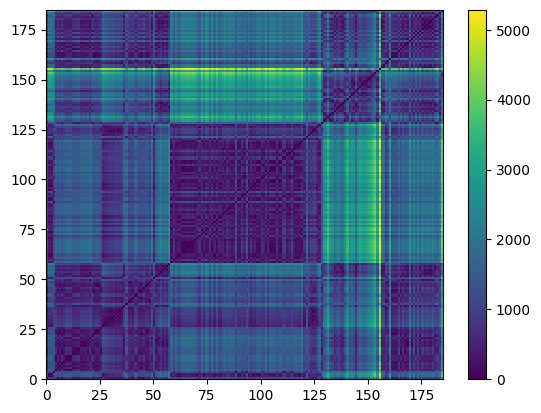

In [ ]:
plt.pcolormesh(dist_mat)
plt.colorbar()
N = len(df_sort)
plt.xlim([0,N])
plt.ylim([0,N])
plt.show()

For n_clusters = 3 The average silhouette_score is : 0.2590834249448641


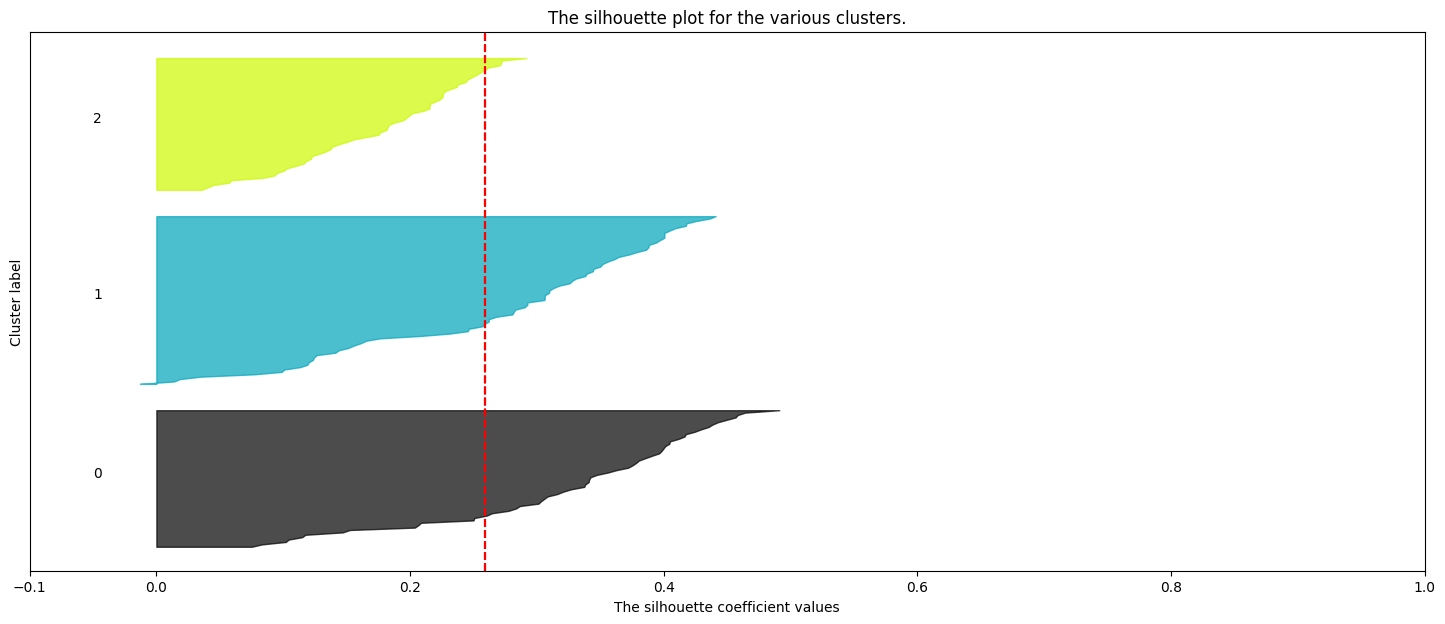

In [ ]:
X["predicted_cluster"] = df_combo["predicted_cluster"]
show_silhouette_plots(X, X['predicted_cluster'])

In [ ]:
# drop city and country
df_combo = df_combo.drop(['City','Country'], axis=1)
cluster_summary = df_combo.groupby('predicted_cluster').mean()
cluster_summary

Cappuccino    Cinema      Wine  Gasoline     Avg Rent  \
predicted_cluster                                                          
0                    2.107931  7.572241  5.429310  1.314828  1087.142931   
1                    1.376761  3.979577  6.389437  0.877324   626.153521   
2                    2.606429  8.457321  9.535357  0.875179  1714.300000   

                   Avg Disposable Income  Movehub Rating  Purchase Power  \
predicted_cluster                                                          
0                            1570.649655       81.630172       50.641207   
1                             476.271972       73.299155       26.354225   
2                            2373.952857       85.525893       64.712679   

                   Health Care  Pollution  Quality of Life  Crime Rating  \
predicted_cluster                                                          
0                    72.493276  35.634310        69.756724     35.305172   
1                    56.561268  59.026338        36.827746     49.038028   
2                    71.215357  39.906250        76.098571     38.732679   

                   predicted_cluster_1  x_projected  y_projected  
predicted_cluster                                                 
0                             0.000000    -2.422899    -0.222523  
1                             0.042254     4.599376     4.884204  
2                             0.000000    -3.077358    -5.422122

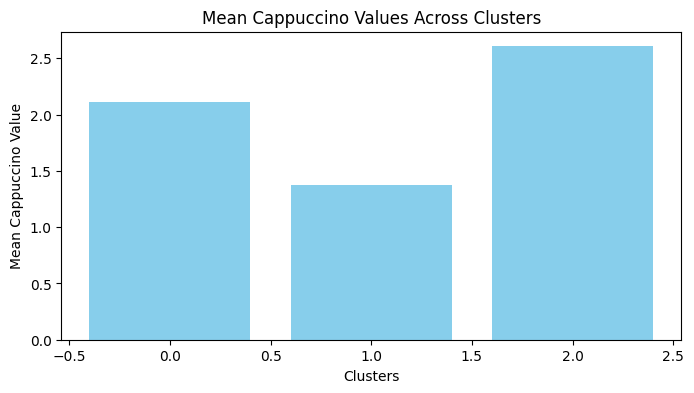

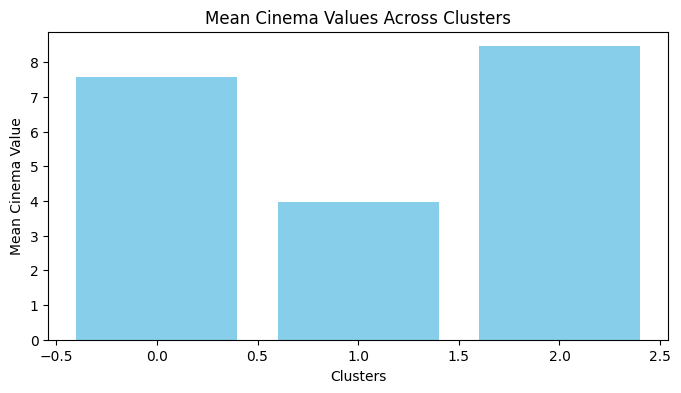

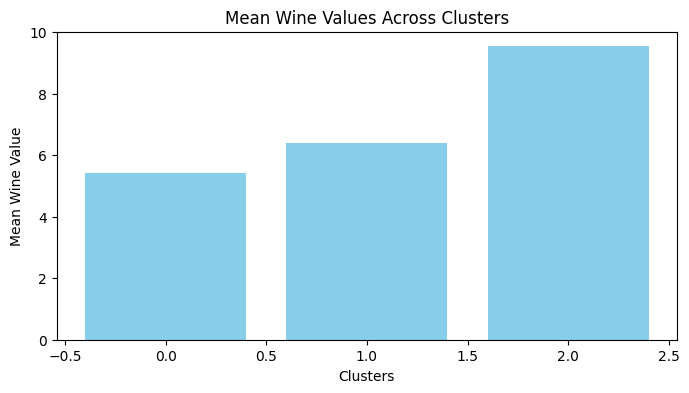

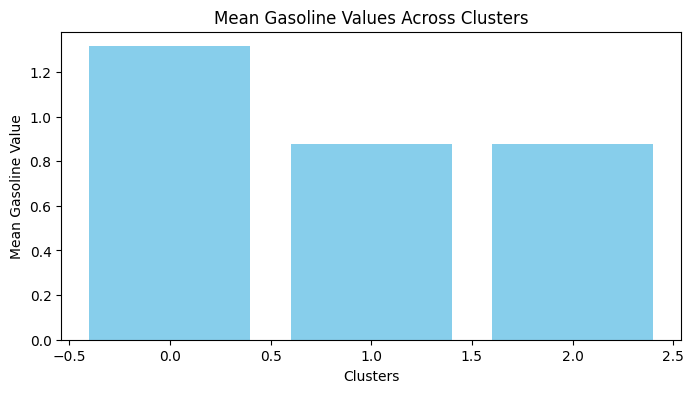

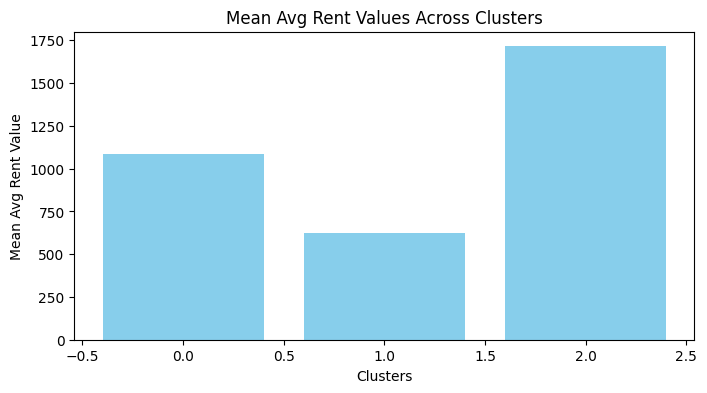

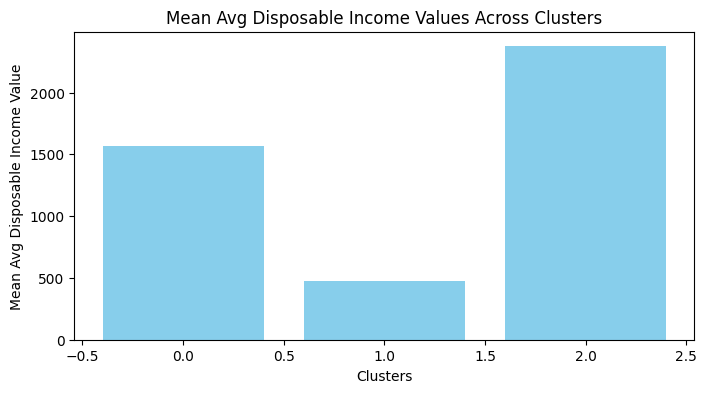

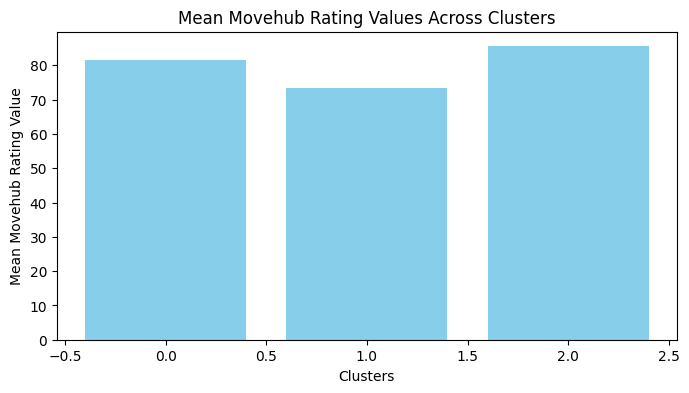

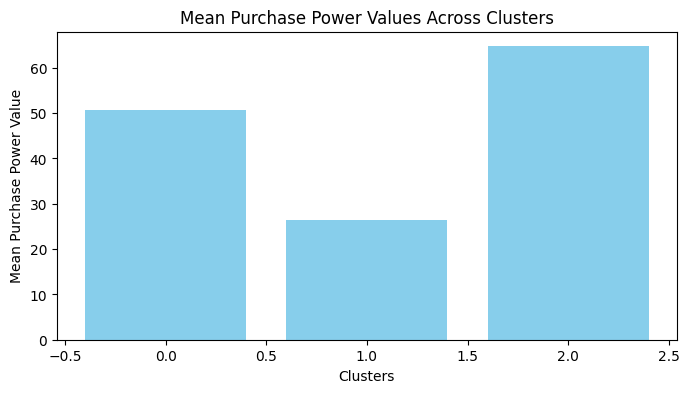

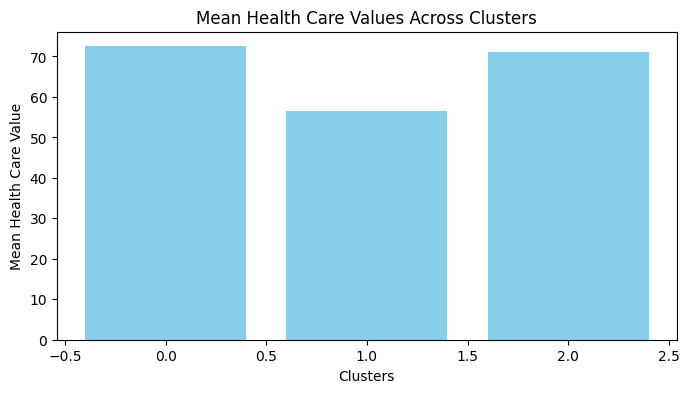

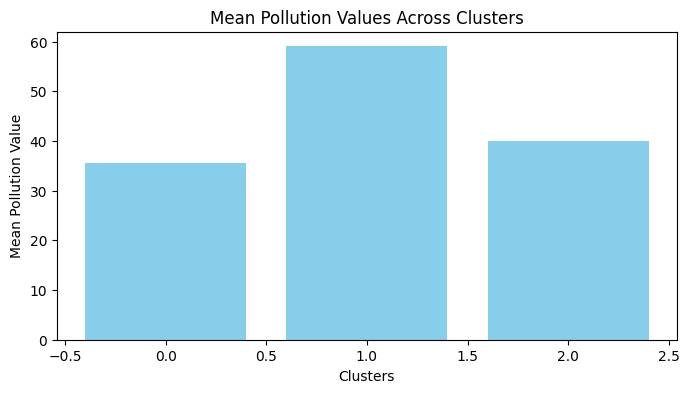

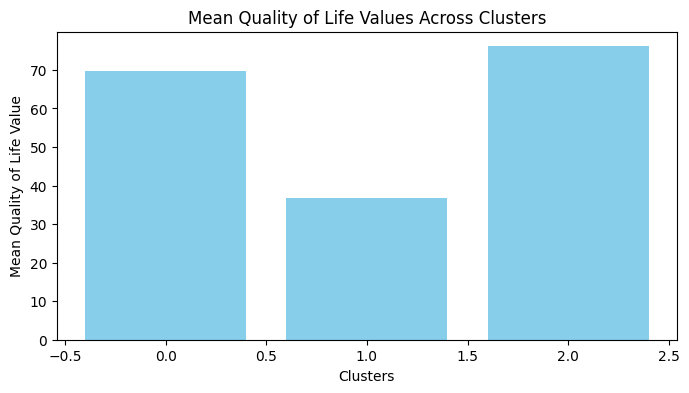

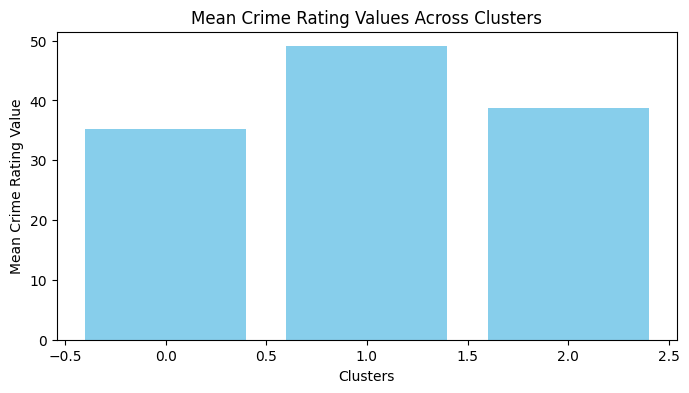

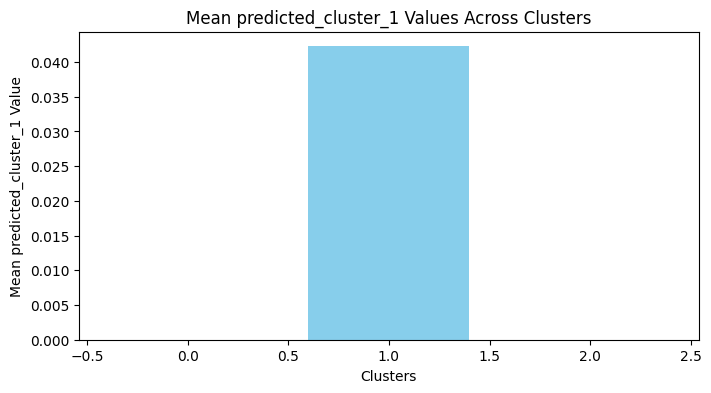

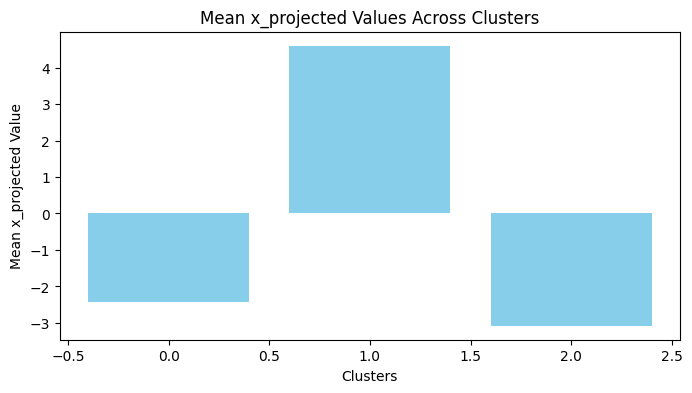

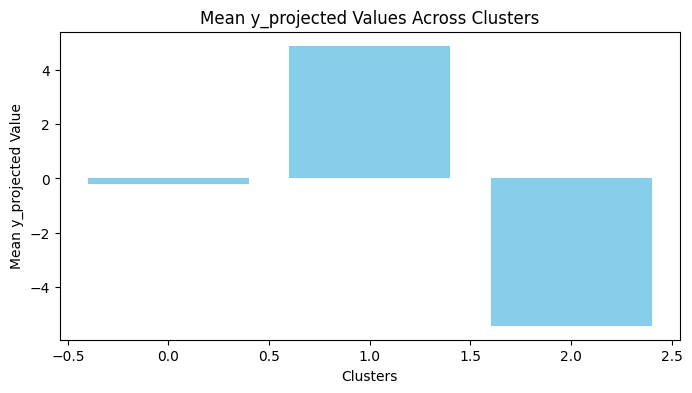

In [ ]:
for attribute in cluster_summary.columns:
    plt.figure(figsize=(8, 4))
    plt.bar(cluster_summary.index, cluster_summary[attribute], color='skyblue')
    plt.xlabel('Clusters')
    plt.ylabel(f'Mean {attribute} Value')
    plt.title(f'Mean {attribute} Values Across Clusters')
    plt.show()

## 11. Discussion

In [74]:
df['predicted_cluster_kmeans']=kmeans.labels_
adjusted_rand_score(df['predicted_cluster_kmeans'], df['predicted_cluster_1'])

-0.003915718201546804

Clustering algorithm #1 revealed what cities were similar in the clusters and what attributes were associated with that cluster. Clustering algorithm #2 revealed insights if there were three clusters instead of two. Specifically showing characteristics of the cluster that was sort of a mix between the two clusters, showing middle values. Such as the average between a high disposable income and low disposable income. There is some reason to believe that one of the clusterings is more meaningful compared to the other one, because one of the algorithms had gave more information and depth compared to the other one. Both algorithms do provide useful insights as one tells us more broadly what values this cluster has while the other algorithm gives sort of an option to see the middle options people could choose.

0      0
1      0
2      0
3      0
4      0
      ..
180    0
181    0
182    0
183    0
184    0
Name: predicted_cluster_1, Length: 185, dtype: int64

0      0
1      0
2      0
3      0
4      0
      ..
180    1
181    1
182    1
183    1
184    1
Name: predicted_cluster_kmeans, Length: 185, dtype: int32

## 12. Conclusion

We worked to understand the dataset by using Hierarchical Clustering and K-Means. Hierarchical Clustering showed which cities are similar to each other. K-Means gave us more details about what makes each group of cities different, like their average features. This information is helpful for people who are choosing where to move and want to cut down their options.

For future work, we're thinking about using more datasets to get a wider view. This could help us see more details and use different methods or algorithms. We also want to try new ways to understand the complex parts of our data and handle outliers better.

These ideas are part of our plan to make our analysis better and more helpful for people making decisions about moving to different places

## References

https://www.architecturaldigest.com/reviews/moving/moving-trends-survey